In [ ]:
!unzip -q B.zip

In [ ]:
!unzip -q results.zip

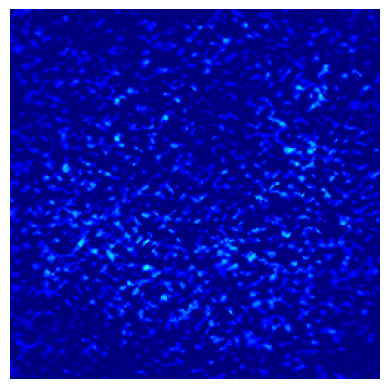

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_jet_colormap(image_path):
    # Загрузка изображения в оттенках серого
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=np.float32)

    # Нормализация в диапазон [0, 1]
    normalized = img_array / 255.0

    # Применение цветовой карты "jet"
    cmap = plt.get_cmap('jet')
    colored = cmap(normalized)

    # Отображение изображения
    plt.imshow(colored)
    plt.axis('off')  # Убираем оси
    plt.show()

# Пример использования
input_image = "/content/aa/M33.png"  # Путь к исходному ч/б изображению
display_jet_colormap(input_image)

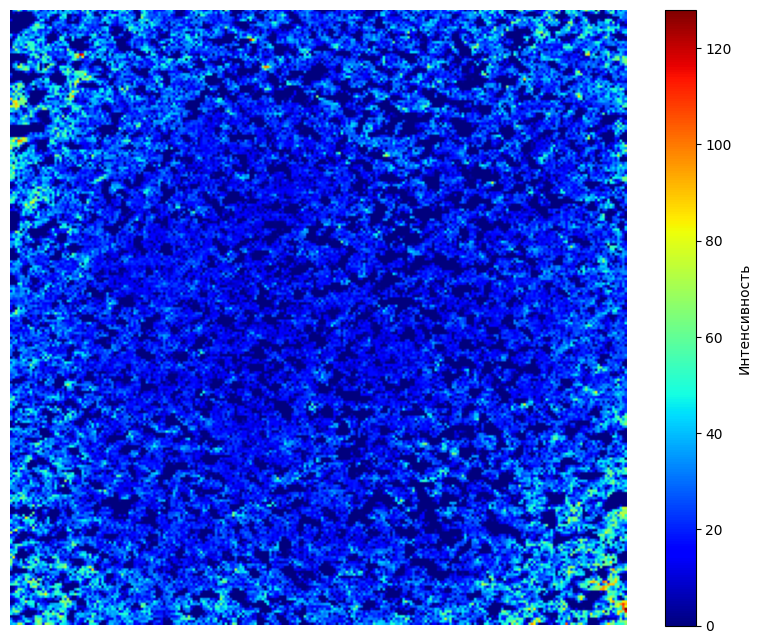

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from PIL import Image

# Загрузка изображения
image_path = '/content/for dataset A/FRESH_GREEN/D.png'  # Укажите путь к вашему изображению
image = Image.open(image_path)
image_data = np.array(image)

# Проверка, является ли изображение одноканальным (например, grayscale)
if len(image_data.shape) > 2:
    print("Изображение имеет несколько каналов. Будет использован первый канал.")
    image_data = image_data[:, :, 0]

# Создание фигуры
plt.figure(figsize=(10, 8))

# Отображение изображения с цветовой картой 'jet'
img = plt.imshow(image_data, cmap='jet')
plt.colorbar(img, label='Интенсивность')  # Добавление цветовой шкалы

# Настройки отображения
#plt.title('Визуализация интенсивности')
plt.axis('off')  # Скрыть оси

# Показать изображение
plt.show()

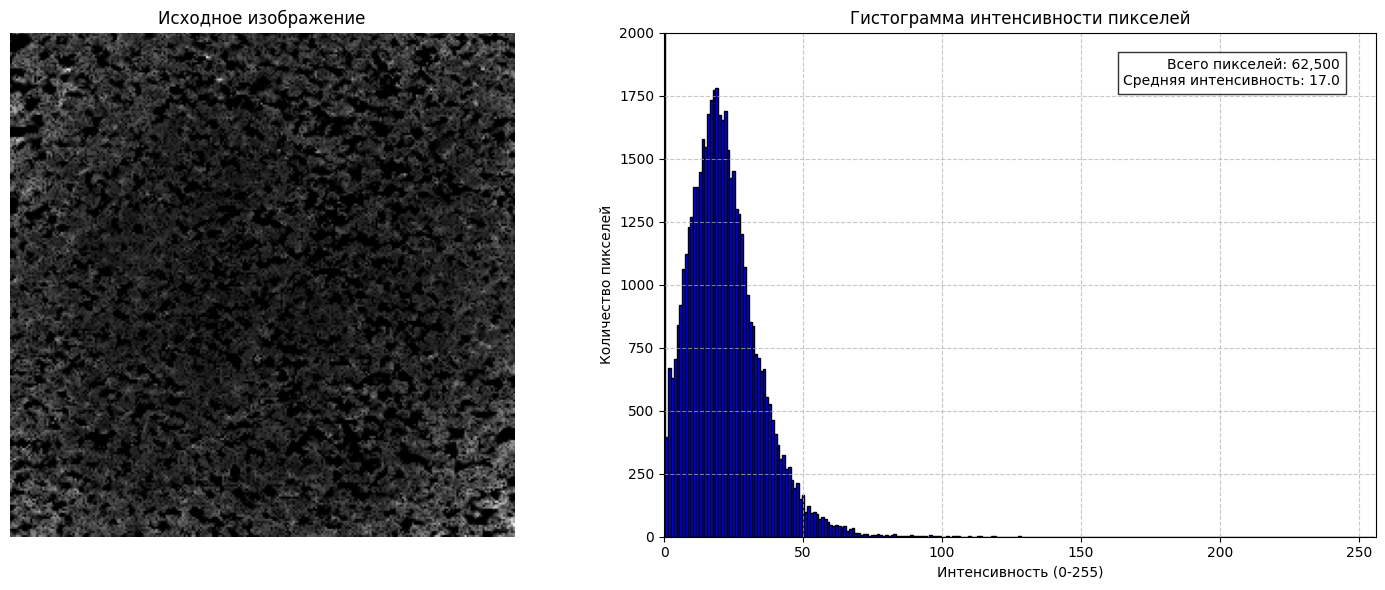


Топ-5 наиболее частых интенсивностей:
1. Интенсивность 0: 13926 пикселей (22.28%)
2. Интенсивность 19: 1780 пикселей (2.85%)
3. Интенсивность 18: 1772 пикселей (2.84%)
4. Интенсивность 17: 1731 пикселей (2.77%)
5. Интенсивность 22: 1689 пикселей (2.70%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Загрузка изображения
#image_path = 'your_image.png'  # Укажите путь к вашему изображению
image = Image.open(image_path)
image_data = np.array(image)

# Если изображение цветное, конвертируем в оттенки серого
if len(image_data.shape) > 2:
    image_data = np.mean(image_data, axis=2).astype(np.uint8)

# Вычисляем гистограмму
hist, bins = np.histogram(image_data.flatten(), bins=256, range=[0, 256])

# Создаем фигуру с двумя subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Отображаем само изображение
ax1.imshow(image_data, cmap='gray')
ax1.set_title('Исходное изображение')
ax1.axis('off')

# Строим гистограмму
ax2.bar(bins[:-1], hist, width=1, color='blue', edgecolor='black')
ax2.set_title('Гистограмма интенсивности пикселей')
ax2.set_xlabel('Интенсивность (0-255)')
ax2.set_ylabel('Количество пикселей')
ax2.set_xlim([0, 256])
ax2.set_ylim([0, 2000])
ax2.grid(True, linestyle='--', alpha=0.7)

# Добавляем статистическую информацию
total_pixels = image_data.size
mean_intensity = np.mean(image_data)
ax2.text(0.95, 0.95,
         f'Всего пикселей: {total_pixels:,}\n'
         f'Средняя интенсивность: {mean_intensity:.1f}',
         transform=ax2.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Дополнительно: выводим пики гистограммы
top_5 = np.argsort(hist)[-5:][::-1]
print("\nТоп-5 наиболее частых интенсивностей:")
for i, intensity in enumerate(top_5, 1):
    print(f"{i}. Интенсивность {intensity}: {hist[intensity]} пикселей "
          f"({hist[intensity]/total_pixels:.2%})")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis

# Загрузка изображения
image_path = '/content/for dataset A/FRESH_GREEN/P.png'
image = Image.open(image_path)
image_data = np.array(image)

# Если изображение цветное, конвертируем в оттенки серого
if len(image_data.shape) > 2:
    image_data = np.mean(image_data, axis=2).astype(np.uint8)

# Нормализуем данные изображения в диапазон 0-1
normalized_image = image_data.astype(float) / 255.0

# Вычисляем гистограмму и нормализуем только диапазон интенсивностей
hist, bins = np.histogram(image_data.flatten(), bins=256, range=[0, 256])
normalized_bins = bins / 255.0

# Вычисляем статистические характеристики
total_pixels = image_data.size
mean_intensity = np.mean(image_data)
std_intensity = np.std(image_data)  # СКО
skewness = skew(image_data.flatten())  # Коэффициент асимметрии
kurt = kurtosis(image_data.flatten())  # Коэффициент эксцесса

# Создаем фигуру с двумя subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Отображаем изображение с colormap 'jet' и цветовой шкалой слева
im = ax1.imshow(normalized_image, cmap='jet', vmin=0, vmax=1)
ax1.set_title('Параметр R')
ax1.axis('off')
cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, location='left')
cbar.set_label('Интенсивность')

# Строим гистограмму
ax2.bar(normalized_bins[:-1], hist, width=1/255, color='blue', edgecolor='black')
ax2.set_title('Гистограмма интенсивности пикселей')
ax2.set_xlabel('Интенсивность')
ax2.set_ylabel('Количество пикселей')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 2000])
ax2.grid(True, linestyle='--', alpha=0.7)

# Добавляем расширенную статистическую информацию
stats_text = (#f'Всего пикселей: {total_pixels:,}\n'
              f'Мат. ожидание: {mean_intensity:.1f}\n'
              f'СКО: {std_intensity:.1f}\n'
              f'Асимметрия: {skewness:.2f}\n'
              f'Эксцесс: {kurt:.2f}')

ax2.text(0.95, 0.95, stats_text,
         transform=ax2.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Дополнительно: выводим пики гистограммы
top_5 = np.argsort(hist)[-5:][::-1]
print("\nТоп-5 наиболее частых интенсивностей:")
for i, intensity in enumerate(top_5, 1):
    print(f"{i}. Интенсивность {intensity}: {hist[intensity]} пикселей "
          f"({hist[intensity]/total_pixels:.2%})")

FileNotFoundError: [Errno 2] No such file or directory: '/content/for dataset A/FRESH_GREEN/P.png'

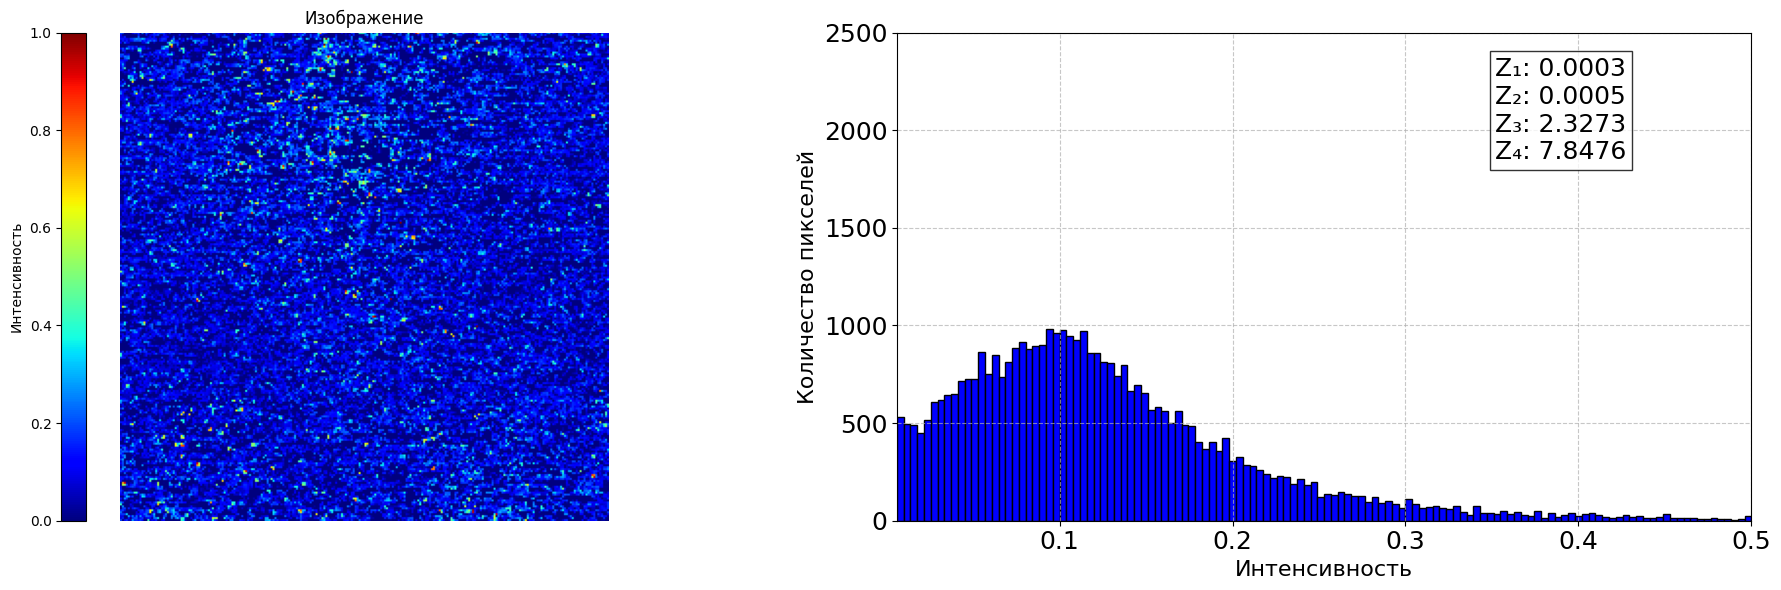


Топ-5 наиболее частых интенсивностей:
1. Интенсивность 0: 21628 пикселей (34.60%)
2. Интенсивность 24: 983 пикселей (1.57%)
3. Интенсивность 26: 976 пикселей (1.56%)
4. Интенсивность 29: 974 пикселей (1.56%)
5. Интенсивность 25: 963 пикселей (1.54%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Загрузка изображения
image_path = '/content/for dataset A/SPOILT_RED/D.png'
image = Image.open(image_path)
image_data = np.array(image)

# Если изображение цветное, конвертируем в оттенки серого
if len(image_data.shape) > 2:
    image_data = np.mean(image_data, axis=2).astype(np.uint8)

# Нормализуем данные изображения в диапазон 0-1
normalized_image = image_data.astype(float) / 255.0

# Вычисляем гистограмму и нормализуем только диапазон интенсивностей
hist, bins = np.histogram(image_data.flatten(), bins=256, range=[0, 256])
normalized_bins = bins / 255.0

# Вычисляем моменты Z1-Z4 по формулам из статьи
def calculate_Z_moments(data):
    q = data.flatten().astype(float) / 255.0  # Добавляем нормализацию
    N = len(q)

    Z1 = np.abs(q).mean()
    Z2 = np.sqrt((q**2).mean())
    Z3 = (q**3).mean() / (Z2**3) if Z2 != 0 else 0
    Z4 = (q**4).mean() / (Z2**4) if Z2 != 0 else 0

    return Z1, Z2, Z3, Z4

Z1, Z2, Z3, Z4 = calculate_Z_moments(normalized_image)

# Вычисляем стандартные статистические характеристики
total_pixels = image_data.size
mean_intensity = np.mean(image_data)
std_intensity = np.std(image_data)  # Стандартное отклонение

# Создаем фигуру с двумя subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Отображаем изображение с colormap 'jet' и цветовой шкалой слева
im = ax1.imshow(normalized_image, cmap='jet', vmin=0, vmax=1)
ax1.set_title('Изображение')
ax1.axis('off')
cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, location='left')
cbar.set_label('Интенсивность')

# Строим гистограмму
ax2.bar(normalized_bins[:-1], hist, width=1/255, color='blue', edgecolor='black')
#ax2.set_title('Гистограмма интенсивности пикселей')
ax2.set_xlabel('Интенсивность', fontsize=16)
ax2.set_ylabel('Количество пикселей', fontsize=16)
ax2.set_xlim([0.006, 0.5])
ax2.set_ylim([0, 2500])
ax2.grid(True, linestyle='--', alpha=0.7)

# Увеличиваем размер цифр на делениях осей
ax2.tick_params(axis='both', which='major', labelsize=18)  # для основных делений
ax2.tick_params(axis='both', which='minor', labelsize=18)  # для второстепенных делений

# Добавляем статистическую информацию (два столбца)
stats_text1 = (f'Z₁: {Z1:.4f}\n'
               f'Z₂: {Z2:.4f}\n'
               f'Z₃: {Z3:.4f}\n'
               f'Z₄: {Z4:.4f}')
ax2.text(0.70, 0.95, stats_text1,
         transform=ax2.transAxes,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(facecolor='white', alpha=0.8), fontsize=18)

plt.tight_layout()
plt.show()

# Дополнительно: выводим пики гистограммы
top_5 = np.argsort(hist)[-5:][::-1]
print("\nТоп-5 наиболее частых интенсивностей:")
for i, intensity in enumerate(top_5, 1):
    print(f"{i}. Интенсивность {intensity}: {hist[intensity]} пикселей "
          f"({hist[intensity]/total_pixels:.2%})")

In [ ]:
import os
import zipfile
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def process_single_image(image_path):
    """Обработка одного изображения и возврат результатов"""
    image = Image.open(image_path)
    image_data = np.array(image)

    if len(image_data.shape) > 2:
        image_data = np.mean(image_data, axis=2).astype(np.uint8)

    normalized_image = image_data.astype(float) / 255.0
    hist, bins = np.histogram(image_data.flatten(), bins=256, range=[0, 256])
    normalized_bins = bins / 255.0

    # Вычисляем моменты по НОРМАЛИЗОВАННЫМ данным
    Z1, Z2, Z3, Z4 = calculate_Z_moments(normalized_image)

    # Собираем результаты
    results = {
        'path': image_path,
        'Z1': Z1,
        'Z2': Z2,
        'Z3': Z3,
        'Z4': Z4,
        'total_pixels': image_data.size,
        'mean_intensity': np.mean(normalized_image),  # Теперь в [0,1]
        'std_intensity': np.std(normalized_image)     # Теперь в [0,1]
    }

    return results, normalized_image, hist, normalized_bins

def calculate_Z_moments(data):
    q = data.flatten().astype(float)  # Уже нормализованы в [0,1]
    N = len(q)

    Z1 = np.abs(q).mean()
    Z2 = np.sqrt((q**2).mean())
    Z3 = (q**3).mean() / (Z2**3) if Z2 != 0 else 0
    Z4 = (q**4).mean() / (Z2**4) if Z2 != 0 else 0

    return Z1, Z2, Z3, Z4

def process_all_images(root_folder, output_zip='results.zip'):
    """Обработка всех изображений в папке и подпапках"""
    # Создаем временную папку для графиков
    plots_dir = 'plots'
    os.makedirs(plots_dir, exist_ok=True)

    # Собираем все изображения
    image_paths = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                image_paths.append(os.path.join(root, file))

    # Обрабатываем изображения
    all_results = []
    for path in tqdm(image_paths, desc="Обработка изображений"):
        try:
            results, _, _, _ = process_single_image(path)
            all_results.append(results)
        except Exception as e:
            print(f"\nОшибка при обработке {path}: {str(e)}")

    # Создаем графики и сохраняем их
    for path in tqdm(image_paths, desc="Создание графиков"):
        try:
            results, normalized_image, hist, normalized_bins = process_single_image(path)

            # Создаем фигуру
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            plt.close('all')

            # Изображение
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            im = ax1.imshow(normalized_image, cmap='jet', vmin=0, vmax=1)
            ax1.set_title(f"Исходное изображение\n{path}", fontsize=10)
            ax1.axis('off')
            fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, location='left')

            # Гистограмма
            ax2.bar(normalized_bins[:-1], hist, width=1/255, color='blue', edgecolor='black')
            ax2.set_title('Гистограмма интенсивности пикселей', fontsize=10)
            ax2.set_xlabel('Интенсивность')
            ax2.set_ylabel('Количество пикселей')
            ax2.set_xlim([0, 1])
            ax2.grid(True, linestyle='--', alpha=0.7)

            # Статистика
            stats_text = (f'Z₁: {results["Z1"]:.4f}\n'
                         f'Z₂: {results["Z2"]:.4f}\n'
                         f'Z₃: {results["Z3"]:.4f}\n'
                         f'Z₄: {results["Z4"]:.4f}\n')
            ax2.text(0.65, 0.95, stats_text,
                    transform=ax2.transAxes,
                    verticalalignment='top',
                    horizontalalignment='left',
                    bbox=dict(facecolor='white', alpha=0.8),
                    fontsize=8)

            # Сохраняем график
            safe_filename = path.replace('/', '_').replace('\\', '_').replace(':', '')
            plot_path = os.path.join(plots_dir, f'{safe_filename}.png')
            plt.savefig(plot_path, bbox_inches='tight', dpi=100)
            plt.close(fig)

        except Exception as e:
            print(f"\nОшибка при создании графика для {path}: {str(e)}")

    # Создаем архив
    with zipfile.ZipFile(output_zip, 'w') as zipf:
        # 1. Сохраняем CSV с результатами
        df = pd.DataFrame(all_results)
        csv_path = 'results.csv'
        df.to_csv(csv_path, index=False)
        zipf.write(csv_path)
        os.remove(csv_path)

        # 2. Добавляем все графики в архив
        for root, _, files in os.walk(plots_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, plots_dir))
                os.remove(file_path)

    # Удаляем временную папку
    os.rmdir(plots_dir)

    print(f"\nОбработка завершена. Результаты сохранены в {output_zip}")
    return all_results

# Пример использования:
if __name__ == "__main__":
    # Обработка всех изображений в папке и подпапках
    root_folder = '/content/for dataset A'
    results = process_all_images(root_folder)

    # Вывод первых 5 результатов для проверки
    print("\nПервые 5 результатов (все значения в диапазоне [0,1]):")
    for i, res in enumerate(results[:5], 1):
        print(f"{i}. {res['path']}: Z1={res['Z1']:.4f}, Z2={res['Z2']:.4f}")

Создание графиков: 100%|██████████| 90/90 [01:24<00:00,  1.07it/s]


Обработка завершена. Результаты сохранены в results.zip

Первые 5 результатов (все значения в диапазоне [0,1]):
1. /content/for dataset A/FRESH_GREEN/R.png: Z1=0.6343, Z2=0.6718
2. /content/for dataset A/FRESH_GREEN/P2.png: Z1=0.3367, Z2=0.3789
3. /content/for dataset A/FRESH_GREEN/Ps.png: Z1=0.1046, Z2=0.1155
4. /content/for dataset A/FRESH_GREEN/P.png: Z1=0.0758, Z2=0.0942
5. /content/for dataset A/FRESH_GREEN/delta.png: Z1=0.3150, Z2=0.4102


In [ ]:
import os
import zipfile
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def process_single_image(image_path):
    """Обработка одного изображения и возврат результатов"""
    image = Image.open(image_path)
    image_data = np.array(image)

    if len(image_data.shape) > 2:
        image_data = np.mean(image_data, axis=2).astype(np.uint8)

    normalized_image = image_data.astype(float) / 255.0
    hist, bins = np.histogram(image_data.flatten(), bins=256, range=[0, 256])
    normalized_bins = bins / 255.0

    # Вычисляем моменты по НОРМАЛИЗОВАННЫМ данным
    Z1, Z2, Z3, Z4 = calculate_Z_moments(normalized_image)

    # Собираем результаты
    results = {
        'path': image_path,
        'Z1': Z1,
        'Z2': Z2,
        'Z3': Z3,
        'Z4': Z4,
        'total_pixels': image_data.size,
        'mean_intensity': np.mean(normalized_image),  # Теперь в [0,1]
        'std_intensity': np.std(normalized_image)     # Теперь в [0,1]
    }

    return results, normalized_image, hist, normalized_bins

from scipy.stats import skew, kurtosis

def calculate_Z_moments(data):
    q = data.flatten().astype(float)  # Нормализованные данные [0,1]

    # Первые два момента (как было)
    Z1 = np.mean(q)
    Z2 = np.sqrt(np.mean(q**2))  # СКЗ (среднеквадратическое значение)

    # Стандартные расчеты для Z3 и Z4
    Z3 = skew(q, bias=False)  # Коэффициент асимметрии
    Z4 = kurtosis(q, bias=False)  # эксцесс (избыточный)

    return Z1, Z2, Z3, Z4

def process_all_images(root_folder, output_zip='results.zip'):
    """Обработка всех изображений в папке и подпапках"""
    # Создаем временную папку для графиков
    plots_dir = 'plots'
    os.makedirs(plots_dir, exist_ok=True)

    # Собираем все изображения
    image_paths = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                image_paths.append(os.path.join(root, file))

    # Обрабатываем изображения
    all_results = []
    for path in tqdm(image_paths, desc="Обработка изображений"):
        try:
            results, _, _, _ = process_single_image(path)
            all_results.append(results)
        except Exception as e:
            print(f"\nОшибка при обработке {path}: {str(e)}")

    # Создаем графики и сохраняем их
    for path in tqdm(image_paths, desc="Создание графиков"):
        try:
            results, normalized_image, hist, normalized_bins = process_single_image(path)

            # Создаем фигуру
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            plt.close('all')

            # Изображение
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            im = ax1.imshow(normalized_image, cmap='jet', vmin=0, vmax=1)
            ax1.set_title(f"Исходное изображение\n{path}", fontsize=10)
            ax1.axis('off')
            fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, location='left')

            # Гистограмма
            ax2.bar(normalized_bins[:-1], hist, width=1/255, color='blue', edgecolor='black')
            ax2.set_title('Гистограмма интенсивности пикселей', fontsize=10)
            ax2.set_xlabel('Интенсивность')
            ax2.set_ylabel('Количество пикселей')
            ax2.set_xlim([0, 1])
            ax2.grid(True, linestyle='--', alpha=0.7)

            # Статистика
            stats_text = (f'Z₁: {results["Z1"]:.4f}\n'
                         f'Z₂: {results["Z2"]:.4f}\n'
                         f'Z₃: {results["Z3"]:.4f}\n'
                         f'Z₄: {results["Z4"]:.4f}\n')
            ax2.text(0.65, 0.95, stats_text,
                    transform=ax2.transAxes,
                    verticalalignment='top',
                    horizontalalignment='left',
                    bbox=dict(facecolor='white', alpha=0.8),
                    fontsize=8)

            # Сохраняем график
            safe_filename = path.replace('/', '_').replace('\\', '_').replace(':', '')
            plot_path = os.path.join(plots_dir, f'{safe_filename}.png')
            plt.savefig(plot_path, bbox_inches='tight', dpi=100)
            plt.close(fig)

        except Exception as e:
            print(f"\nОшибка при создании графика для {path}: {str(e)}")

    # Создаем архив
    with zipfile.ZipFile(output_zip, 'w') as zipf:
        # 1. Сохраняем CSV с результатами
        df = pd.DataFrame(all_results)
        csv_path = 'results.csv'
        df.to_csv(csv_path, index=False)
        zipf.write(csv_path)
        os.remove(csv_path)

        # 2. Добавляем все графики в архив
        for root, _, files in os.walk(plots_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, plots_dir))
                os.remove(file_path)

    # Удаляем временную папку
    os.rmdir(plots_dir)

    print(f"\nОбработка завершена. Результаты сохранены в {output_zip}")
    return all_results

# Пример использования:
if __name__ == "__main__":
    # Обработка всех изображений в папке и подпапках
    root_folder = '/content/for dataset A'
    results = process_all_images(root_folder)

    # Вывод первых 5 результатов для проверки
    print("\nПервые 5 результатов (все значения в диапазоне [0,1]):")
    for i, res in enumerate(results[:5], 1):
        print(f"{i}. {res['path']}: Z1={res['Z1']:.4f}, Z2={res['Z2']:.4f}")

Создание графиков: 100%|██████████| 90/90 [01:25<00:00,  1.05it/s]



Обработка завершена. Результаты сохранены в results.zip

Первые 5 результатов (все значения в диапазоне [0,1]):
1. /content/for dataset A/FRESH_GREEN/R.png: Z1=0.6343, Z2=0.6718
2. /content/for dataset A/FRESH_GREEN/P2.png: Z1=0.3367, Z2=0.3789
3. /content/for dataset A/FRESH_GREEN/Ps.png: Z1=0.1046, Z2=0.1155
4. /content/for dataset A/FRESH_GREEN/P.png: Z1=0.0758, Z2=0.0942
5. /content/for dataset A/FRESH_GREEN/delta.png: Z1=0.3150, Z2=0.4102


Создание графиков: 100%|██████████| 90/90 [01:25<00:00,  1.06it/s]



Матрица корреляций между Z1-Z4:
          Z1        Z2        Z3        Z4
Z1  1.000000  0.981304 -0.825827  0.021448
Z2  0.981304  1.000000 -0.779833 -0.012320
Z3 -0.825827 -0.779833  1.000000 -0.066669
Z4  0.021448 -0.012320 -0.066669  1.000000

Статистические различия между группами:

Размеры эффектов между FRESH и SPOILT:
    Color Metric  Effect_Size  Fresh_Mean  Spoilt_Mean  Change_Pct
0     RED     Z1    -0.318037    0.459826     0.374834  -18.483514
1     RED     Z2    -0.279790    0.489033     0.415984  -14.937403
2     RED     Z3     0.520774   -0.322158     0.530282 -264.603181
3     RED     Z4    -0.372127    5.719057     2.309299  -59.620988
4   GREEN     Z1     0.215285    0.307282     0.353256   14.961233
5   GREEN     Z2     0.337403    0.339067     0.411238   21.285380
6   GREEN     Z3     0.401031    0.352830     0.743760  110.798361
7   GREEN     Z4     0.589407    0.447541     2.207573  393.266745
8    BLUE     Z1     0.287588    0.225556     0.275067   21.950842
9

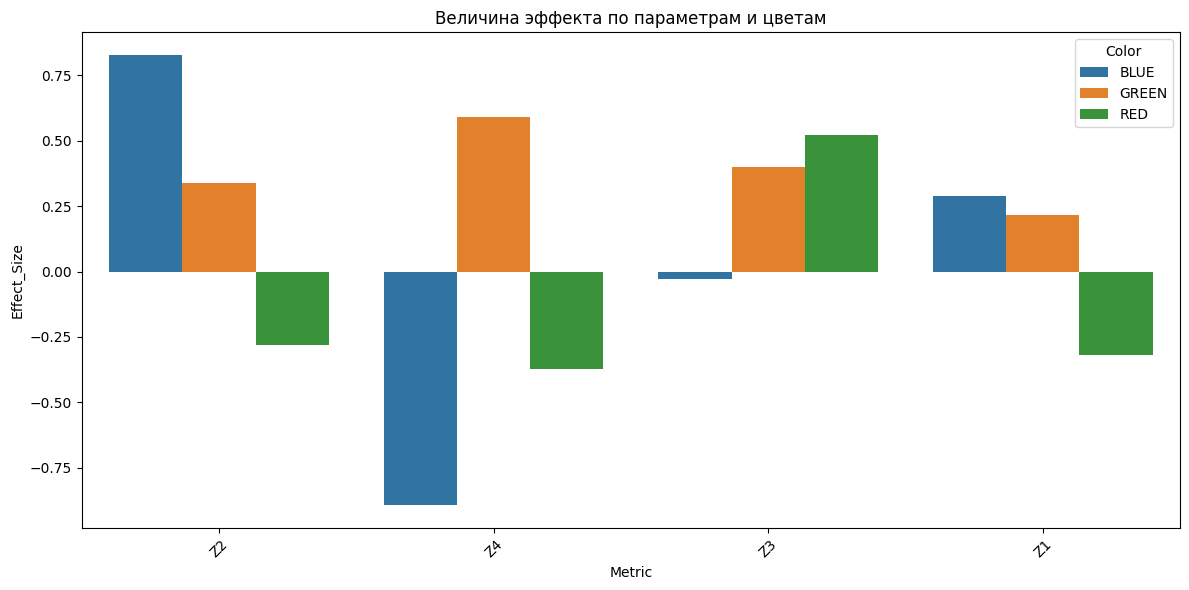

In [ ]:
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def analyze_results(all_results):
    # Создаем DataFrame
    df = pd.DataFrame(all_results)

    # Извлекаем категории из путей (FRESH/HALF/SPOILT и цвет)
    df['category'] = df['path'].str.extract(r'(FRESH|HALF|SPOILT)_([A-Z]+)')[0] + '_' + \
                     df['path'].str.extract(r'(FRESH|HALF|SPOILT)_([A-Z]+)')[1]

    # 1. Анализ корреляций между параметрами
    print("\nМатрица корреляций между Z1-Z4:")
    corr_matrix = df[['Z1', 'Z2', 'Z3', 'Z4']].corr()
    print(corr_matrix)

    # Визуализация корреляций
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Матрица корреляций моментов Z1-Z4')
    plt.savefig('correlation_matrix.png')
    plt.close()

    # 2. Сравнение групп (ANOVA/Kruskal-Wallis + post-hoc тесты)
    print("\nСтатистические различия между группами:")
    metrics = ['Z1', 'Z2', 'Z3', 'Z4']

    with open('statistical_analysis.txt', 'w') as f:
        for metric in metrics:
            groups = [df[df['category'].str.contains(cat)][metric]
                      for cat in ['FRESH_RED', 'HALF_RED', 'SPOILT_RED',
                                 'FRESH_GREEN', 'HALF_GREEN', 'SPOILT_GREEN',
                                 'FRESH_BLUE', 'HALF_BLUE', 'SPOILT_BLUE']]

            # Проверка нормальности (можно добавить тест Шапиро-Уилка)
            # ANOVA или Kruskal-Wallis
            stat, p = kruskal(*groups)

            f.write(f"\n--- Анализ для {metric} ---\n")
            f.write(f"Kruskal-Wallis test: statistic={stat:.3f}, p-value={p:.5f}\n")

            if p < 0.05:
                # Post-hoc анализ
                posthoc = pairwise_tukeyhsd(
                    endog=df[metric],
                    groups=df['category'],
                    alpha=0.05
                )
                f.write(str(posthoc))

    # 3. Визуализация распределений параметров по группам
    plt.figure(figsize=(15, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x='category', y=metric, data=df)
        plt.title(f'Распределение {metric} по группам')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('group_comparison.png')
    plt.close()

    # 4. Расчет эффектов между FRESH и SPOILT для каждого цвета
    effect_sizes = []
    colors = ['RED', 'GREEN', 'BLUE']

    for color in colors:
        for metric in metrics:
            fresh = df[df['category'] == f'FRESH_{color}'][metric]
            spoilt = df[df['category'] == f'SPOILT_{color}'][metric]

            # Cohen's d
            d = (np.mean(spoilt) - np.mean(fresh)) / np.sqrt((np.std(fresh)**2 + np.std(spoilt)**2)/2)

            effect_sizes.append({
                'Color': color,
                'Metric': metric,
                'Effect_Size': d,
                'Fresh_Mean': np.mean(fresh),
                'Spoilt_Mean': np.mean(spoilt),
                'Change_Pct': (np.mean(spoilt) - np.mean(fresh))/np.mean(fresh)*100
            })

    effect_df = pd.DataFrame(effect_sizes)
    print("\nРазмеры эффектов между FRESH и SPOILT:")
    print(effect_df)

    return df, effect_df

def process_all_images(root_folder, output_zip='results.zip'):
    """Обработка всех изображений в папке и подпапках"""
    # Создаем временную папку для графиков
    plots_dir = 'plots'
    os.makedirs(plots_dir, exist_ok=True)

    # Собираем все изображения
    image_paths = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                image_paths.append(os.path.join(root, file))

    # Обрабатываем изображения
    all_results = []
    for path in tqdm(image_paths, desc="Обработка изображений"):
        try:
            results, _, _, _ = process_single_image(path)
            all_results.append(results)
        except Exception as e:
            print(f"\nОшибка при обработке {path}: {str(e)}")

    # Создаем графики и сохраняем их
    for path in tqdm(image_paths, desc="Создание графиков"):
        try:
            results, normalized_image, hist, normalized_bins = process_single_image(path)

            # Создаем фигуру
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            plt.close('all')

            # Изображение
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            im = ax1.imshow(normalized_image, cmap='jet', vmin=0, vmax=1)
            ax1.set_title(f"Исходное изображение\n{path}", fontsize=10)
            ax1.axis('off')
            fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, location='left')

            # Гистограмма
            ax2.bar(normalized_bins[:-1], hist, width=1/255, color='blue', edgecolor='black')
            ax2.set_title('Гистограмма интенсивности пикселей', fontsize=10)
            ax2.set_xlabel('Интенсивность')
            ax2.set_ylabel('Количество пикселей')
            ax2.set_xlim([0, 1])
            ax2.grid(True, linestyle='--', alpha=0.7)

            # Статистика
            stats_text = (f'Z₁: {results["Z1"]:.4f}\n'
                         f'Z₂: {results["Z2"]:.4f}\n'
                         f'Z₃: {results["Z3"]:.4f}\n'
                         f'Z₄: {results["Z4"]:.4f}\n')
            ax2.text(0.65, 0.95, stats_text,
                    transform=ax2.transAxes,
                    verticalalignment='top',
                    horizontalalignment='left',
                    bbox=dict(facecolor='white', alpha=0.8),
                    fontsize=8)

            # Сохраняем график
            safe_filename = path.replace('/', '_').replace('\\', '_').replace(':', '')
            plot_path = os.path.join(plots_dir, f'{safe_filename}.png')
            plt.savefig(plot_path, bbox_inches='tight', dpi=100)
            plt.close(fig)

        except Exception as e:
            print(f"\nОшибка при создании графика для {path}: {str(e)}")

    # Анализ результатов после сбора всех данных
    df, effect_df = analyze_results(all_results)
    effect_df.to_csv('effect_sizes.csv', index=False)

    # Создаем архив
    with zipfile.ZipFile(output_zip, 'w') as zipf:
        # 1. Сохраняем CSV с результатами
        results_df = pd.DataFrame(all_results)
        csv_path = 'results.csv'
        results_df.to_csv(csv_path, index=False)
        zipf.write(csv_path)
        os.remove(csv_path)

        # 2. Добавляем аналитические файлы
        zipf.write('correlation_matrix.png')
        zipf.write('group_comparison.png')
        zipf.write('statistical_analysis.txt')
        zipf.write('effect_sizes.csv')

        # 3. Добавляем все графики в архив
        for root, _, files in os.walk(plots_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, plots_dir))
                os.remove(file_path)

    # Удаляем временные файлы
    os.remove('correlation_matrix.png')
    os.remove('group_comparison.png')
    os.remove('statistical_analysis.txt')
    os.remove('effect_sizes.csv')
    os.rmdir(plots_dir)

    print(f"\nОбработка завершена. Результаты сохранены в {output_zip}")
    return all_results, df, effect_df

    # Пример анализа после получения результатов
if __name__ == "__main__":
    root_folder = '/content/for dataset A'
    all_results, stats_df, effect_sizes = process_all_images(root_folder)

    # 1. Вывод топ-5 самых значимых параметров
    top_effects = effect_sizes.sort_values('Effect_Size', key=abs, ascending=False).head(5)
    print("\nТоп-5 параметров с наибольшими эффектами:")
    print(top_effects[['Color', 'Metric', 'Effect_Size', 'Change_Pct']])

    # 2. Анализ для зеленого дихроизма (D)
    green_d = effect_sizes[(effect_sizes['Color'] == 'GREEN') &
                          (effect_sizes['Metric'].isin(['Z3', 'Z4']))]
    print("\nАнализ зеленого дихроизма (D):")
    print(green_d)

    # 3. Визуализация топ-параметров
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Metric', y='Effect_Size', hue='Color',
                data=effect_sizes.sort_values('Effect_Size', ascending=False))
    plt.title('Величина эффекта по параметрам и цветам')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_effects.png')
    plt.show()

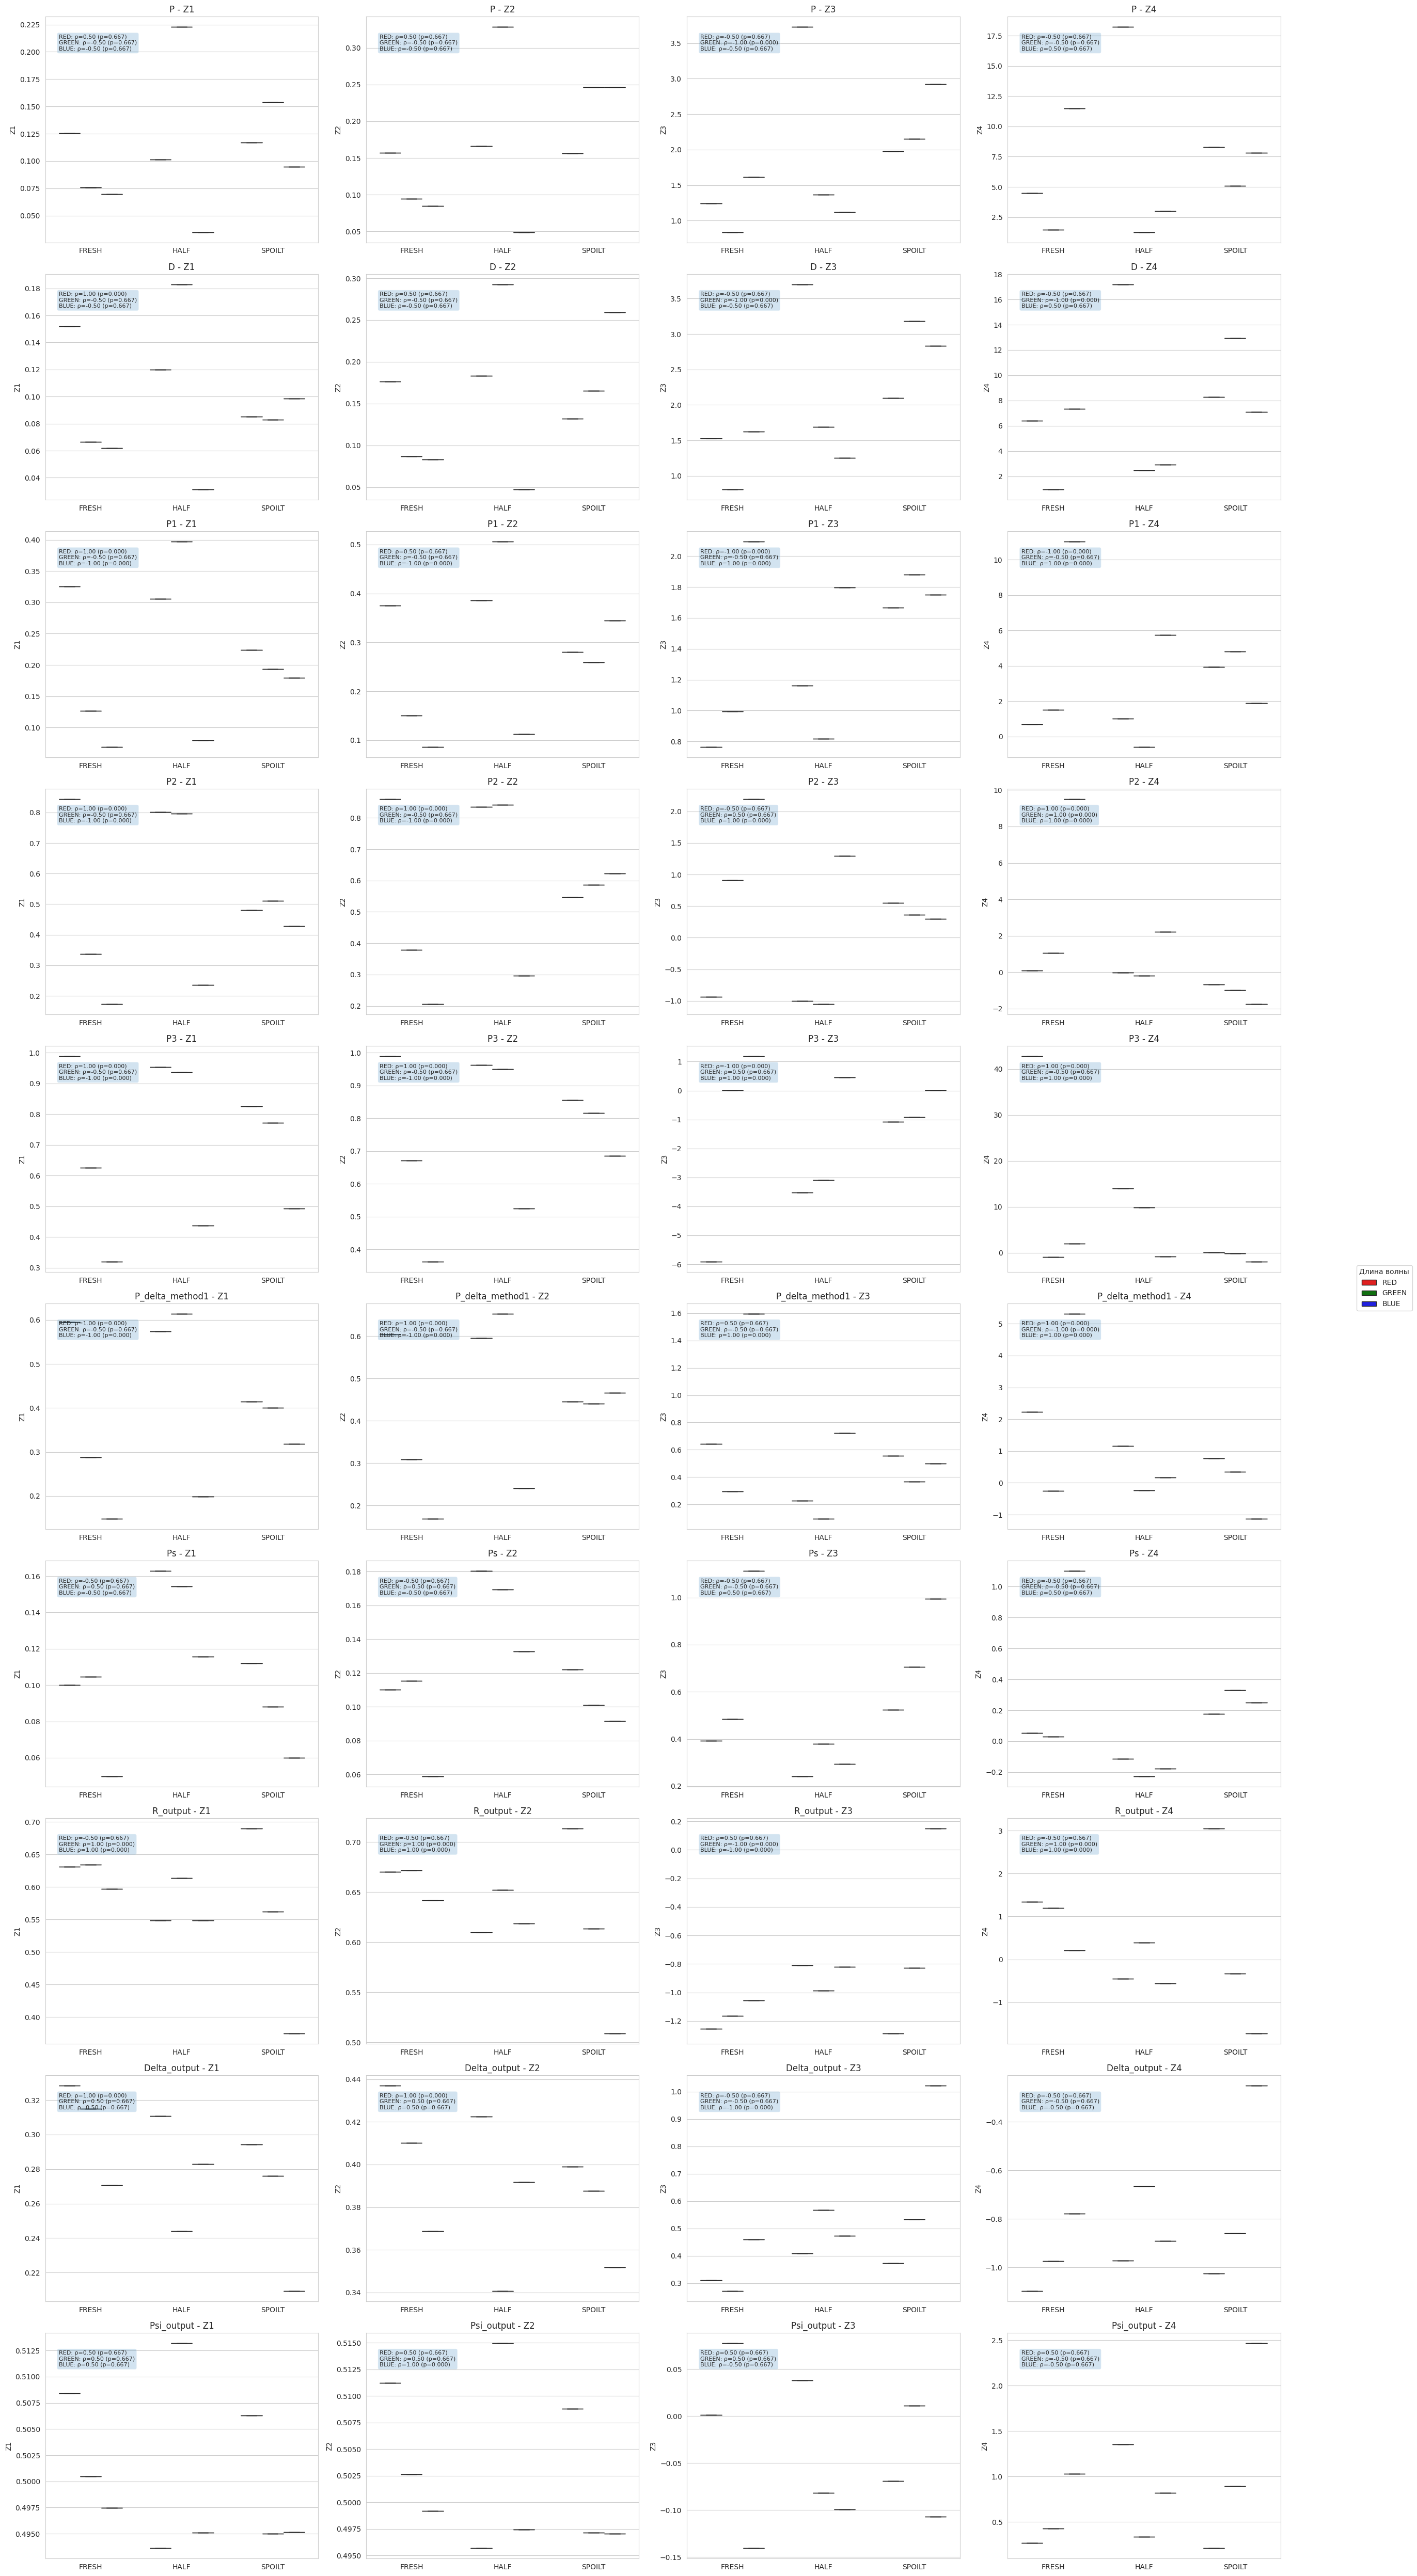

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка и подготовка данных
data = pd.read_csv("Книга1.csv", sep=';')
data[['freshness_color', 'method']] = data['path'].str.split('/', expand=True)
data[['freshness', 'color']] = data['freshness_color'].str.split('_', expand=True)
data['freshness_encoded'] = data['freshness'].map({'FRESH': 2, 'HALF': 1, 'SPOILT': 0})

# Параметры для анализа
methods = data['method'].unique()
moments = ['Z1', 'Z2', 'Z3', 'Z4']
colors = {'RED': 'red', 'GREEN': 'green', 'BLUE': 'blue'}

# Создаем фигуру
fig, axes = plt.subplots(len(methods), len(moments), figsize=(25, 5*len(methods)))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, method in enumerate(methods):
    method_data = data[data['method'] == method]

    for j, moment in enumerate(moments):
        ax = axes[i,j]

        # Boxplot с разделением по цвету
        sns.boxplot(
            x='freshness',
            y=moment,
            hue='color',
            data=method_data,
            order=['FRESH', 'HALF', 'SPOILT'],
            palette=colors,
            ax=ax,
            width=0.7
        )

        # Рассчитываем корреляцию для каждого цвета
        corr_text = []
        for clr in ['RED', 'GREEN', 'BLUE']:
            subset = method_data[method_data['color'] == clr]
            if not subset.empty:
                corr, pval = stats.spearmanr(subset['freshness_encoded'], subset[moment])
                corr_text.append(f"{clr}: ρ={corr:.2f} (p={pval:.3f})")

        # Настройка графика
        ax.set_title(f"{method} - {moment}")
        ax.set_xlabel('')
        ax.set_ylabel(moment)
        ax.legend_.remove()  # Убираем легенду из каждого subplot

        # Добавляем текст с корреляциями
        ax.annotate(
            '\n'.join(corr_text),
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', alpha=0.2),
            fontsize=8
        )

# Общая легенда
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Длина волны',
           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

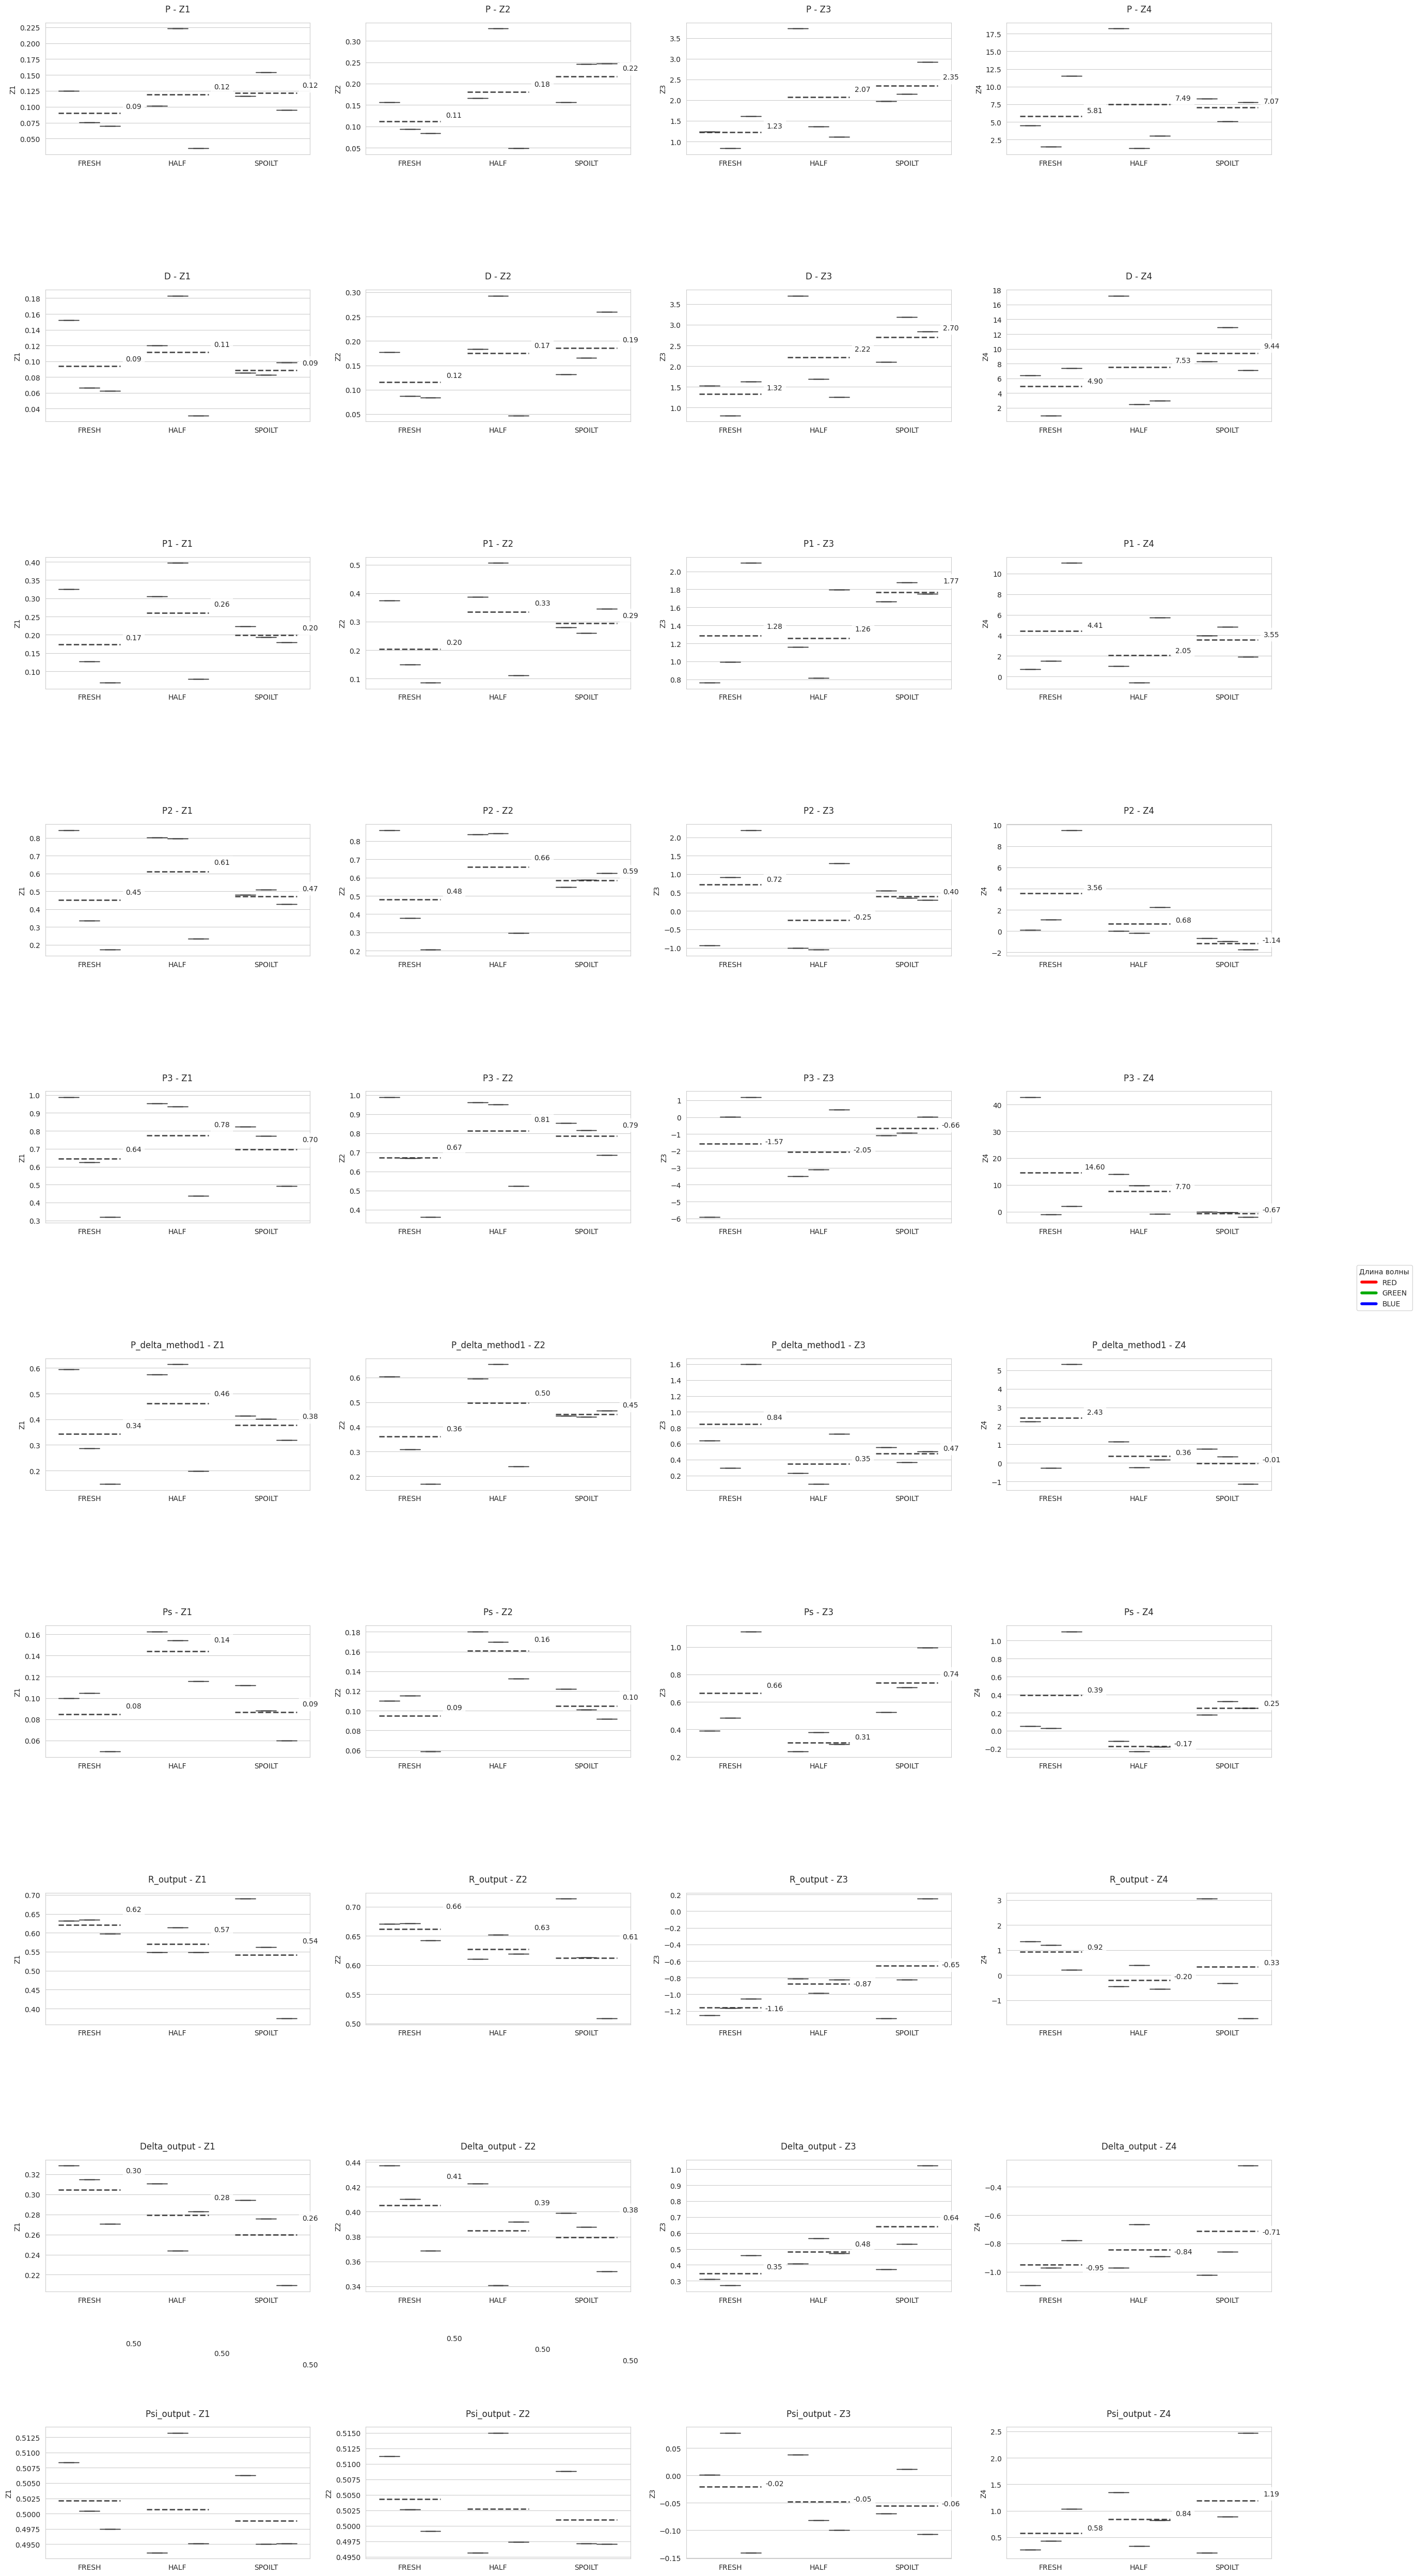

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data = pd.read_csv("Книга1.csv", sep=';')
data[['freshness_color', 'method']] = data['path'].str.split('/', expand=True)
data[['freshness', 'color']] = data['freshness_color'].str.split('_', expand=True)

# Настройки цветов
palette = {'RED': '#FF0000', 'GREEN': '#00AA00', 'BLUE': '#0000FF'}
sns.set_style("whitegrid")
# Настройки цветов

edge_colors = {'RED': '#990000', 'GREEN': '#006600', 'BLUE': '#000099'}  # Для контура boxplot'ов
# Создаем фигуру
methods = data['method'].unique()
moments = ['Z1', 'Z2', 'Z3', 'Z4']
fig, axes = plt.subplots(len(methods), len(moments), figsize=(25, 5*len(methods)))

for i, method in enumerate(methods):
    method_data = data[data['method'] == method]

    for j, moment in enumerate(moments):
        ax = axes[i,j]

        # Boxplot с цветами
        sns.boxplot(
            x='freshness',
            y=moment,
            hue='color',
            data=method_data,
            order=['FRESH', 'HALF', 'SPOILT'],
            palette=palette,
            ax=ax,
            width=0.7,
            showfliers=False
        )

        # Добавляем средние значения между цветами
        for freshness_idx, freshness in enumerate(['FRESH', 'HALF', 'SPOILT']):
            # Вычисляем среднее между всеми цветами для данной свежести
            mean_val = method_data[method_data['freshness'] == freshness][moment].mean()

            # Рисуем горизонтальную линию среднего
            ax.axhline(
                y=mean_val,
                xmin=freshness_idx/3 + 0.05,
                xmax=(freshness_idx+1)/3 - 0.05,
                color='black',
                linestyle='--',
                linewidth=2,
                alpha=0.7
            )

            # Подписываем значение среднего
            ax.text(
                x=freshness_idx + 0.5,
                y=mean_val * 1.05,
                s=f'{mean_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

        # Настройка графика
        ax.set_title(f"{method} - {moment}", fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel(moment)
        ax.legend_.remove()

# Общая легенда
handles = [plt.Line2D([0], [0], color=palette[c], lw=4) for c in ['RED', 'GREEN', 'BLUE']]
fig.legend(handles, ['RED', 'GREEN', 'BLUE'], title='Длина волны',
           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

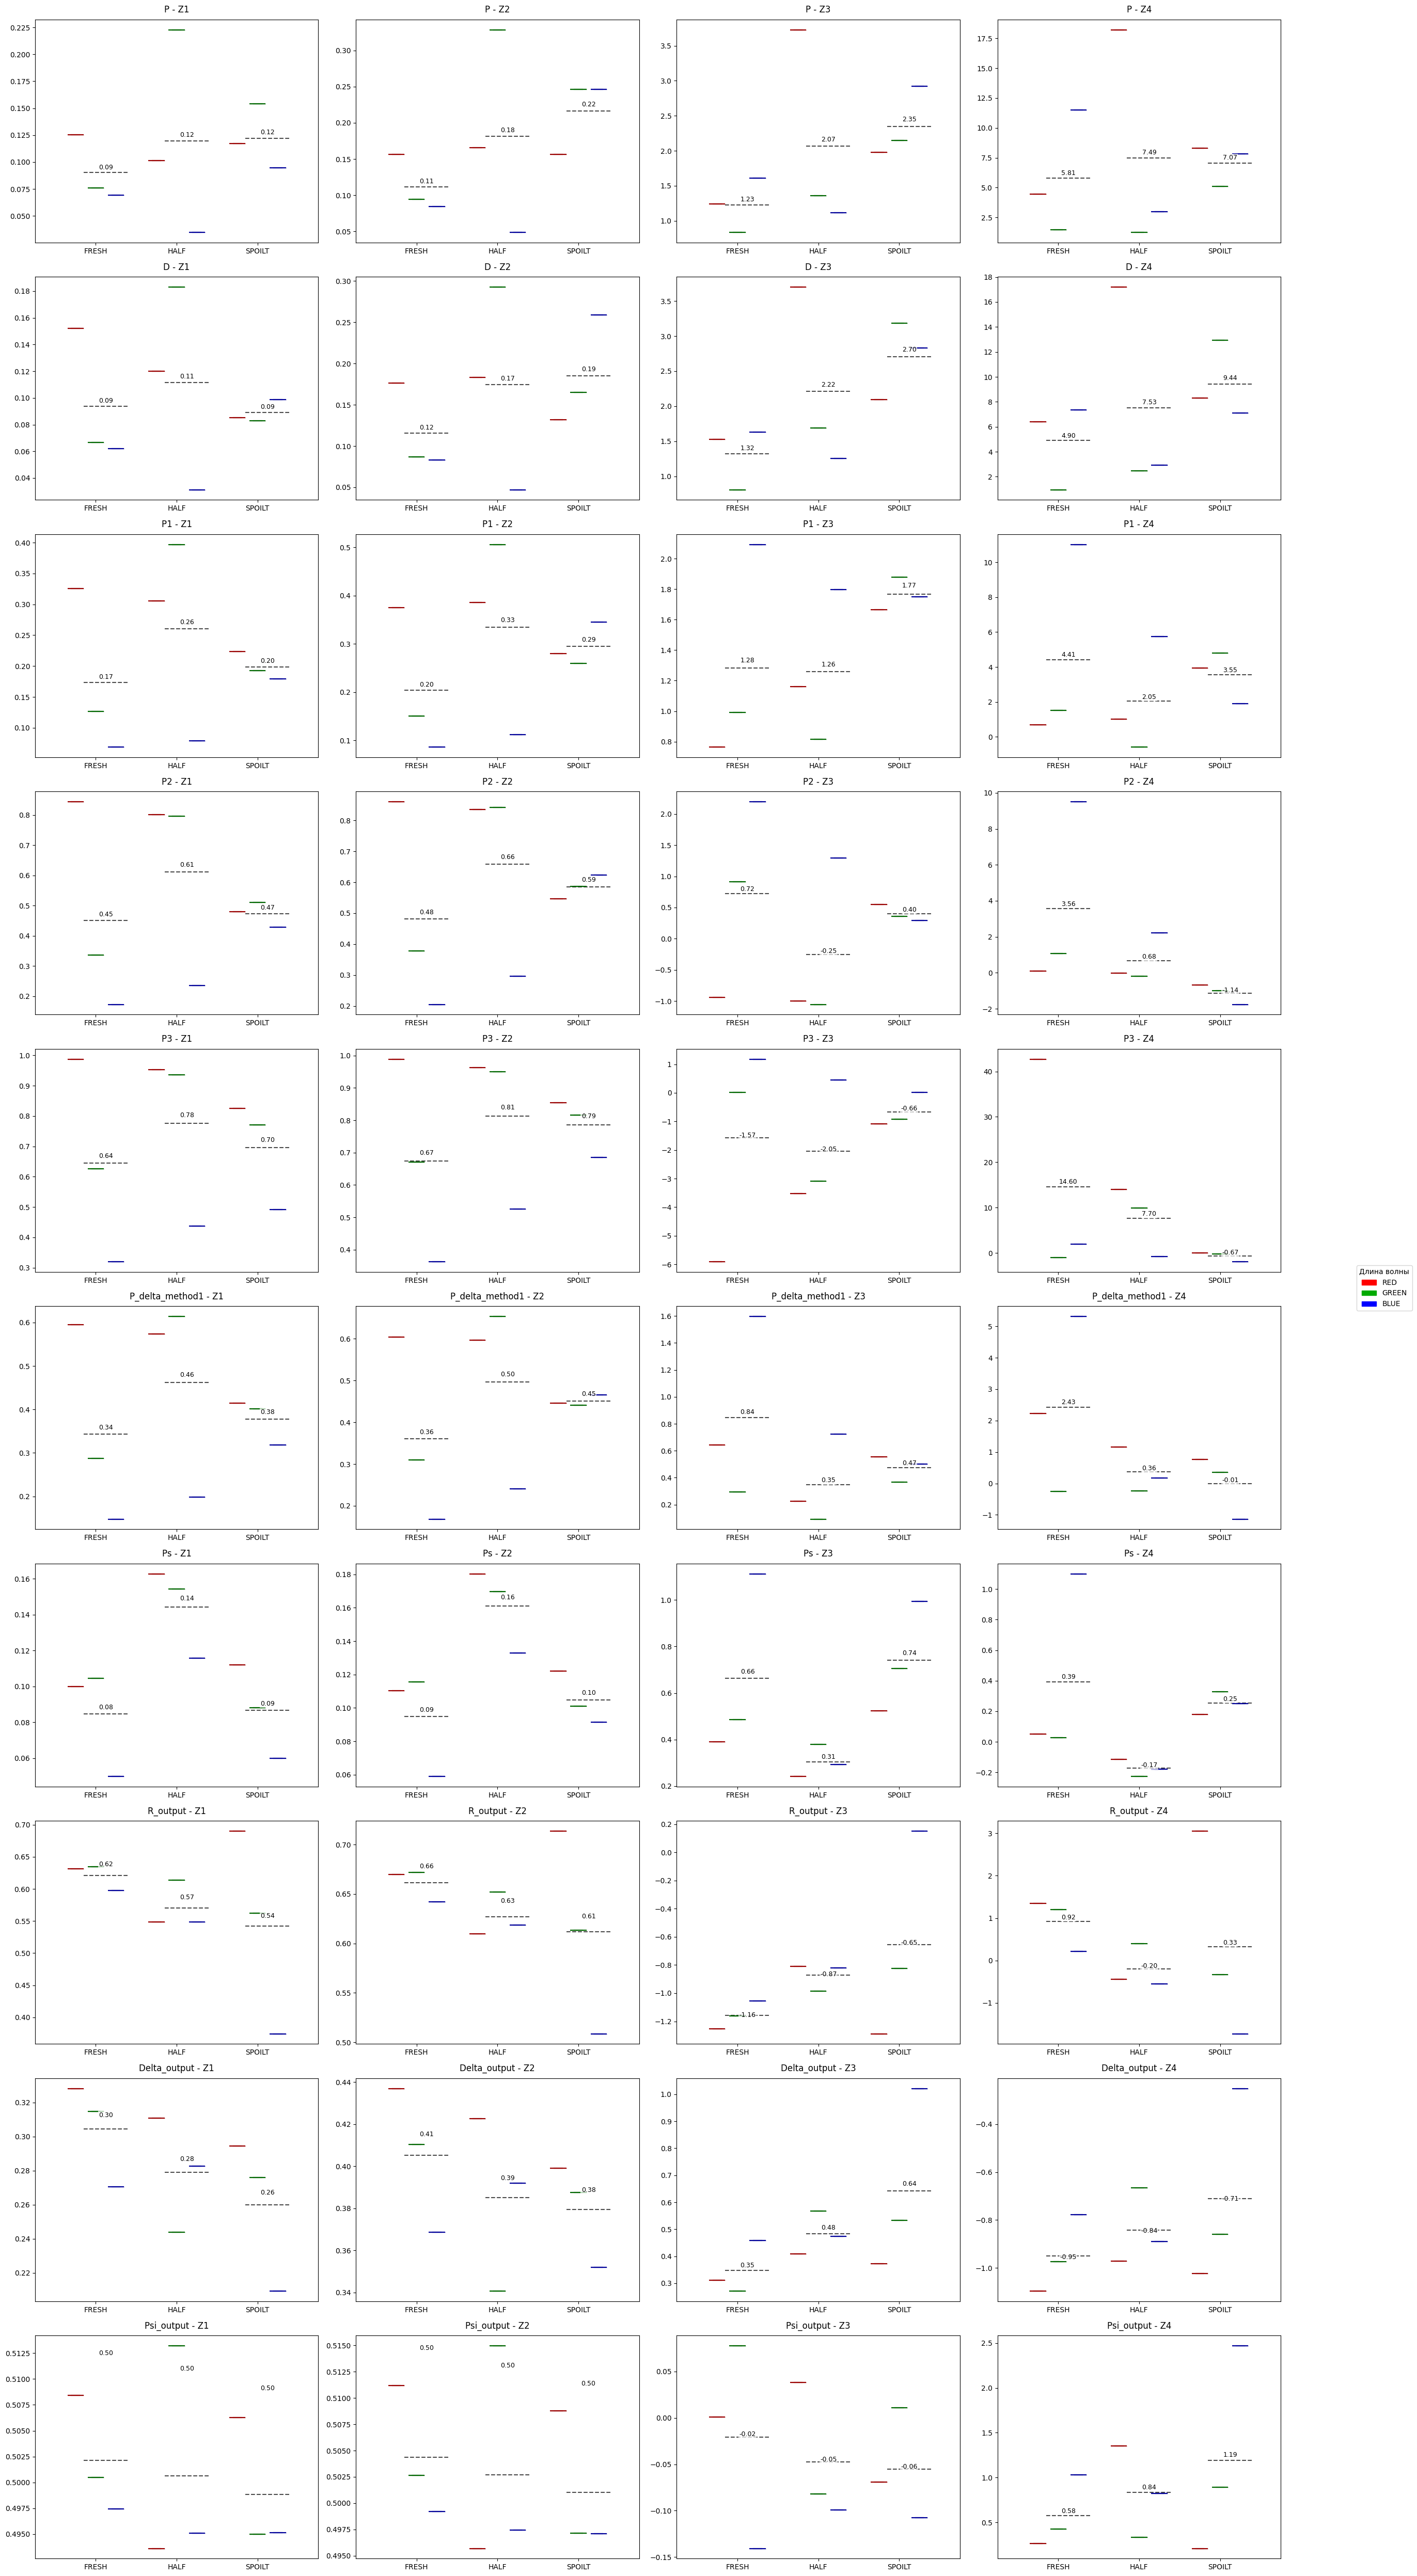

KeyError: 'p_value'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
import numpy as np

# Загрузка данных
data = pd.read_csv("Книга1.csv", sep=';')
data[['freshness_color', 'method']] = data['path'].str.split('/', expand=True)
data[['freshness', 'color']] = data['freshness_color'].str.split('_', expand=True)

# Кодируем свежесть численно
data['freshness_encoded'] = data['freshness'].map({'FRESH': 2, 'HALF': 1, 'SPOILT': 0})

# Настройки цветов
palette = {'RED': '#FF0000', 'GREEN': '#00AA00', 'BLUE': '#0000FF'}  # Яркие насыщенные цвета
edge_colors = {'RED': '#990000', 'GREEN': '#006600', 'BLUE': '#000099'}  # Для контура boxplot'ов

# Создаем фигуру
methods = data['method'].unique()
moments = ['Z1', 'Z2', 'Z3', 'Z4']
fig, axes = plt.subplots(len(methods), len(moments), figsize=(25, 5*len(methods)))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for i, method in enumerate(methods):
    method_data = data[data['method'] == method]

    for j, moment in enumerate(moments):
        ax = axes[i,j]

        # Ручное построение boxplot с контролем цветов
        for k, color_type in enumerate(['RED', 'GREEN', 'BLUE']):
            subset = method_data[method_data['color'] == color_type]
            if not subset.empty:
                # Основной boxplot
                box = ax.boxplot(
                    subset.groupby('freshness')[moment].apply(list),
                    positions=[x + k*0.25 for x in range(3)],
                    widths=0.2,
                    patch_artist=True,
                    showfliers=False
                )

                # Установка цветов
                for patch in box['boxes']:
                    patch.set_facecolor(palette[color_type])
                    patch.set_edgecolor(edge_colors[color_type])
                    patch.set_alpha(0.7)

                # Медиана и усы
                for element in ['medians', 'whiskers', 'caps']:
                    plt.setp(box[element], color=edge_colors[color_type], linewidth=1.5)

        # Добавляем средние значения между цветами для каждой свежести
        for fresh_idx, freshness in enumerate(['FRESH', 'HALF', 'SPOILT']):
            # Вычисляем среднее между всеми цветами для данной свежести
            mean_val = method_data[method_data['freshness'] == freshness][moment].mean()

            # Рисуем горизонтальную линию среднего
            ax.hlines(
                y=mean_val,
                xmin=fresh_idx + 0.1,  # Начало линии (немного правее левого края)
                xmax=fresh_idx + 0.65, # Конец линии (немного левее правого края)
                colors='black',
                linestyles='dashed',
                linewidth=1.5,
                alpha=0.7
            )

            # Подписываем значение среднего
            ax.text(
                x=fresh_idx + 0.375,  # Центр между цветами
                y=mean_val * 1.02,    # Немного выше линии
                s=f'{mean_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

        # Настройка осей (оставляем без изменений)
        ax.set_xticks([0.25, 1.25, 2.25])
        ax.set_xticklabels(['FRESH', 'HALF', 'SPOILT'])
        ax.set_title(f"{method} - {moment}", pad=10)

# Создаем кастомную легенду (без изменений)
legend_patches = [
    mpatches.Patch(color=palette['RED'], label='RED'),
    mpatches.Patch(color=palette['GREEN'], label='GREEN'),
    mpatches.Patch(color=palette['BLUE'], label='BLUE')
]
fig.legend(handles=legend_patches, title='Длина волны',
           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

Топ-5 значимых корреляций:
   Method Moment  Color  Correlation  P_value Significance
7       P     Z3  GREEN         -1.0      0.0     p < 0.05
12      D     Z1    RED          1.0      0.0     p < 0.05
19      D     Z3  GREEN         -1.0      0.0     p < 0.05
22      D     Z4  GREEN         -1.0      0.0     p < 0.05
24     P1     Z1    RED          1.0      0.0     p < 0.05


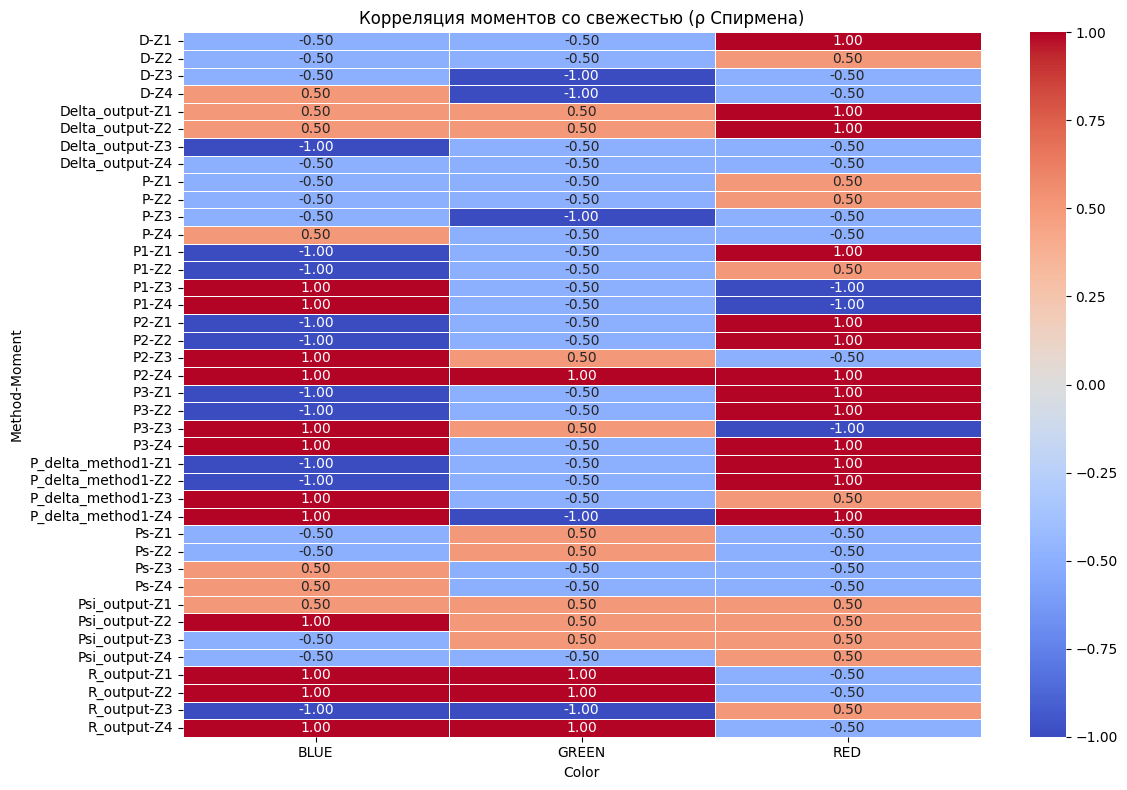

In [ ]:
# Улучшенный код с обработкой ошибок
correlation_results = []

for method in methods:
    method_data = data[data['method'] == method]

    for moment in moments:
        for color_type in ['RED', 'GREEN', 'BLUE']:
            subset = method_data[method_data['color'] == color_type]
            if len(subset) >= 3:  # Минимум 3 точки для корреляции
                try:
                    corr, p_val = stats.spearmanr(subset['freshness_encoded'], subset[moment])
                    correlation_results.append({
                        'Method': method,
                        'Moment': moment,
                        'Color': color_type,
                        'Correlation': corr,
                        'P_value': p_val,  # Исправлено на P_value с заглавной P
                        'Significance': 'p < 0.05' if p_val < 0.05 else 'NS'
                    })
                except Exception as e:
                    print(f"Ошибка для {method}-{moment}-{color_type}: {str(e)}")

# Создаем DataFrame
corr_df = pd.DataFrame(correlation_results)

# Проверяем наличие столбцов перед фильтрацией
required_columns = ['Correlation', 'P_value']
if all(col in corr_df.columns for col in required_columns):
    # Фильтрация и сортировка
    significant_correlations = corr_df[corr_df['P_value'] < 0.05].sort_values(
        by='Correlation', key=abs, ascending=False)

    print("Топ-5 значимых корреляций:")
    print(significant_correlations.head(5))
else:
    print("В данных отсутствуют необходимые столбцы для анализа")
    print("Доступные столбцы:", corr_df.columns.tolist())

# Визуализация (с проверкой)
if not corr_df.empty:
    plt.figure(figsize=(12, 8))
    pivot_data = corr_df.pivot_table(
        values='Correlation',
        index=['Method', 'Moment'],
        columns='Color',
        fill_value=0  # Заполняем пропуски нулями
    )
    sns.heatmap(
        pivot_data,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        fmt=".2f",
        linewidths=.5
    )
    plt.title('Корреляция моментов со свежестью (ρ Спирмена)')
    plt.tight_layout()
    plt.show()
else:
    print("Нет данных для визуализации")


Полные результаты корреляционного анализа:
         Method Moment Color       ρ  p-value Significance
              P     Z1   RED  0.5000   0.6667          Нет
              P     Z1 GREEN -0.5000   0.6667          Нет
              P     Z1  BLUE -0.5000   0.6667          Нет
              P     Z2   RED  0.5000   0.6667          Нет
              P     Z2 GREEN -0.5000   0.6667          Нет
              P     Z2  BLUE -0.5000   0.6667          Нет
              P     Z3   RED -0.5000   0.6667          Нет
              P     Z3 GREEN -1.0000   0.0000           Да
              P     Z3  BLUE -0.5000   0.6667          Нет
              P     Z4   RED -0.5000   0.6667          Нет
              P     Z4 GREEN -0.5000   0.6667          Нет
              P     Z4  BLUE  0.5000   0.6667          Нет
              D     Z1   RED  1.0000   0.0000           Да
              D     Z1 GREEN -0.5000   0.6667          Нет
              D     Z1  BLUE -0.5000   0.6667          Нет
            

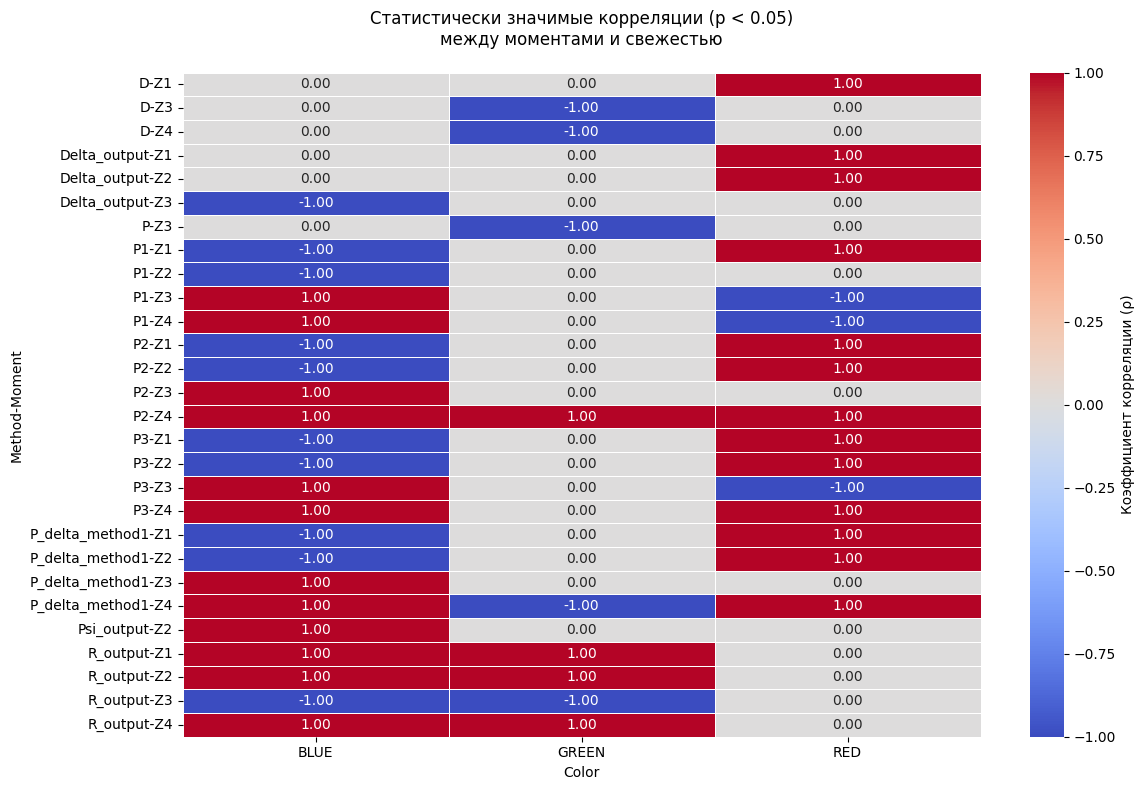

In [ ]:
# Улучшенный код с выводом корреляций и p-values
correlation_results = []

for method in methods:
    method_data = data[data['method'] == method]

    for moment in moments:
        for color_type in ['RED', 'GREEN', 'BLUE']:
            subset = method_data[method_data['color'] == color_type]
            if len(subset) >= 3:  # Минимум 3 точки для корреляции
                try:
                    corr, p_val = stats.spearmanr(subset['freshness_encoded'], subset[moment])
                    correlation_results.append({
                        'Method': method,
                        'Moment': moment,
                        'Color': color_type,
                        'ρ': corr,  # Используем греческую букву для наглядности
                        'p-value': p_val,
                        'Significance': 'Да' if p_val < 0.05 else 'Нет'
                    })
                except Exception as e:
                    print(f"Ошибка для {method}-{moment}-{color_type}: {str(e)}")

# Создаем DataFrame
corr_df = pd.DataFrame(correlation_results)

# Форматируем вывод
pd.set_option('display.max_rows', None)  # Показывать все строки
pd.set_option('display.float_format', '{:.4f}'.format)  # 4 знака после запятой

# Выводим полную таблицу результатов
print("\nПолные результаты корреляционного анализа:")
print(corr_df[['Method', 'Moment', 'Color', 'ρ', 'p-value', 'Significance']].to_string(index=False))

# Фильтруем только значимые результаты (p < 0.05)
significant_correlations = corr_df[corr_df['p-value'] < 0.05].sort_values(
    by='ρ', key=abs, ascending=False)

print("\nТоп-5 наиболее значимых корреляций:")
print(significant_correlations[['Method', 'Moment', 'Color', 'ρ', 'p-value']].head(5).to_string(index=False))

# Визуализация значимых корреляций
if not significant_correlations.empty:
    plt.figure(figsize=(12, 8))
    pivot_data = significant_correlations.pivot_table(
        values='ρ',
        index=['Method', 'Moment'],
        columns='Color',
        fill_value=0
    )
    sns.heatmap(
        pivot_data,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Коэффициент корреляции (ρ)'}
    )
    plt.title('Статистически значимые корреляции (p < 0.05)\nмежду моментами и свежестью', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("\nНет статистически значимых корреляций (p < 0.05)")

In [ ]:
import pandas as pd

data = {
    "Method": ["P"]*12 + ["D"]*12 + ["P1"]*12 + ["P2"]*12 + ["P3"]*12 +
             ["P_delta_method1"]*12 + ["Ps"]*12 + ["R_output"]*12 +
             ["Delta_output"]*12 + ["Psi_output"]*12,
    "Moment": ["Z1","Z1","Z1","Z2","Z2","Z2","Z3","Z3","Z3","Z4","Z4","Z4"]*10,
    "Color": ["RED","GREEN","BLUE"]*40,
    "ρ": [0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5,-0.5,0.5,
          1.0,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5,-1.0,0.5,
          1.0,-0.5,-1.0,0.5,-0.5,-1.0,-1.0,-0.5,1.0,-1.0,-0.5,1.0,
          1.0,-0.5,-1.0,1.0,-0.5,-1.0,-0.5,0.5,1.0,1.0,1.0,1.0,
          1.0,-0.5,-1.0,1.0,-0.5,-1.0,-1.0,0.5,1.0,1.0,-0.5,1.0,
          1.0,-0.5,-1.0,1.0,-0.5,-1.0,0.5,-0.5,1.0,1.0,-1.0,1.0,
          -0.5,0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,0.5,
          -0.5,1.0,1.0,-0.5,1.0,1.0,0.5,-1.0,-1.0,-0.5,1.0,1.0,
          1.0,0.5,0.5,1.0,0.5,0.5,-0.5,-0.5,-1.0,-0.5,-0.5,-0.5,
          0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-0.5,0.5,-0.5,-0.5],
    "p-value": [0.6667]*6 + [0.0000] + [0.6667]*5 +  # P
               [0.0000] + [0.6667]*11 +  # D
               [0.0000]*7 + [0.6667]*5 +  # P1
               [0.0000]*9 + [0.6667]*3 +  # P2
               [0.0000]*9 + [0.6667]*3 +  # P3
               [0.0000]*9 + [0.6667]*3 +  # P_delta_method1
               [0.6667]*12 +  # Ps
               [0.0000]*9 + [0.6667]*3 +  # R_output
               [0.0000]*3 + [0.6667]*9 +  # Delta_output
               [0.6667]*9 + [0.0000] + [0.6667]*2,  # Psi_output
    "Significance": ["Нет"]*6 + ["Да"] + ["Нет"]*5 +  # P
                   ["Да"] + ["Нет"]*11 +  # D
                   ["Да"]*7 + ["Нет"]*5 +  # P1
                   ["Да"]*9 + ["Нет"]*3 +  # P2
                   ["Да"]*9 + ["Нет"]*3 +  # P3
                   ["Да"]*9 + ["Нет"]*3 +  # P_delta_method1
                   ["Нет"]*12 +  # Ps
                   ["Да"]*9 + ["Нет"]*3 +  # R_output
                   ["Да"]*3 + ["Нет"]*9 +  # Delta_output
                   ["Нет"]*9 + ["Да"] + ["Нет"]*2  # Psi_output
}

# Проверка длин
for key, value in data.items():
    print(f"{key}: {len(value)}")

# Создаем DataFrame
df = pd.DataFrame(data)

# Сохраняем в CSV
df.to_csv('корреляционный_анализ.csv', index=False, encoding='utf-8-sig', sep=';')

print("Файл 'корреляционный_анализ.csv' успешно создан!")

Method: 120
Moment: 120
Color: 120
ρ: 120
p-value: 120
Significance: 120
Файл 'корреляционный_анализ.csv' успешно создан!


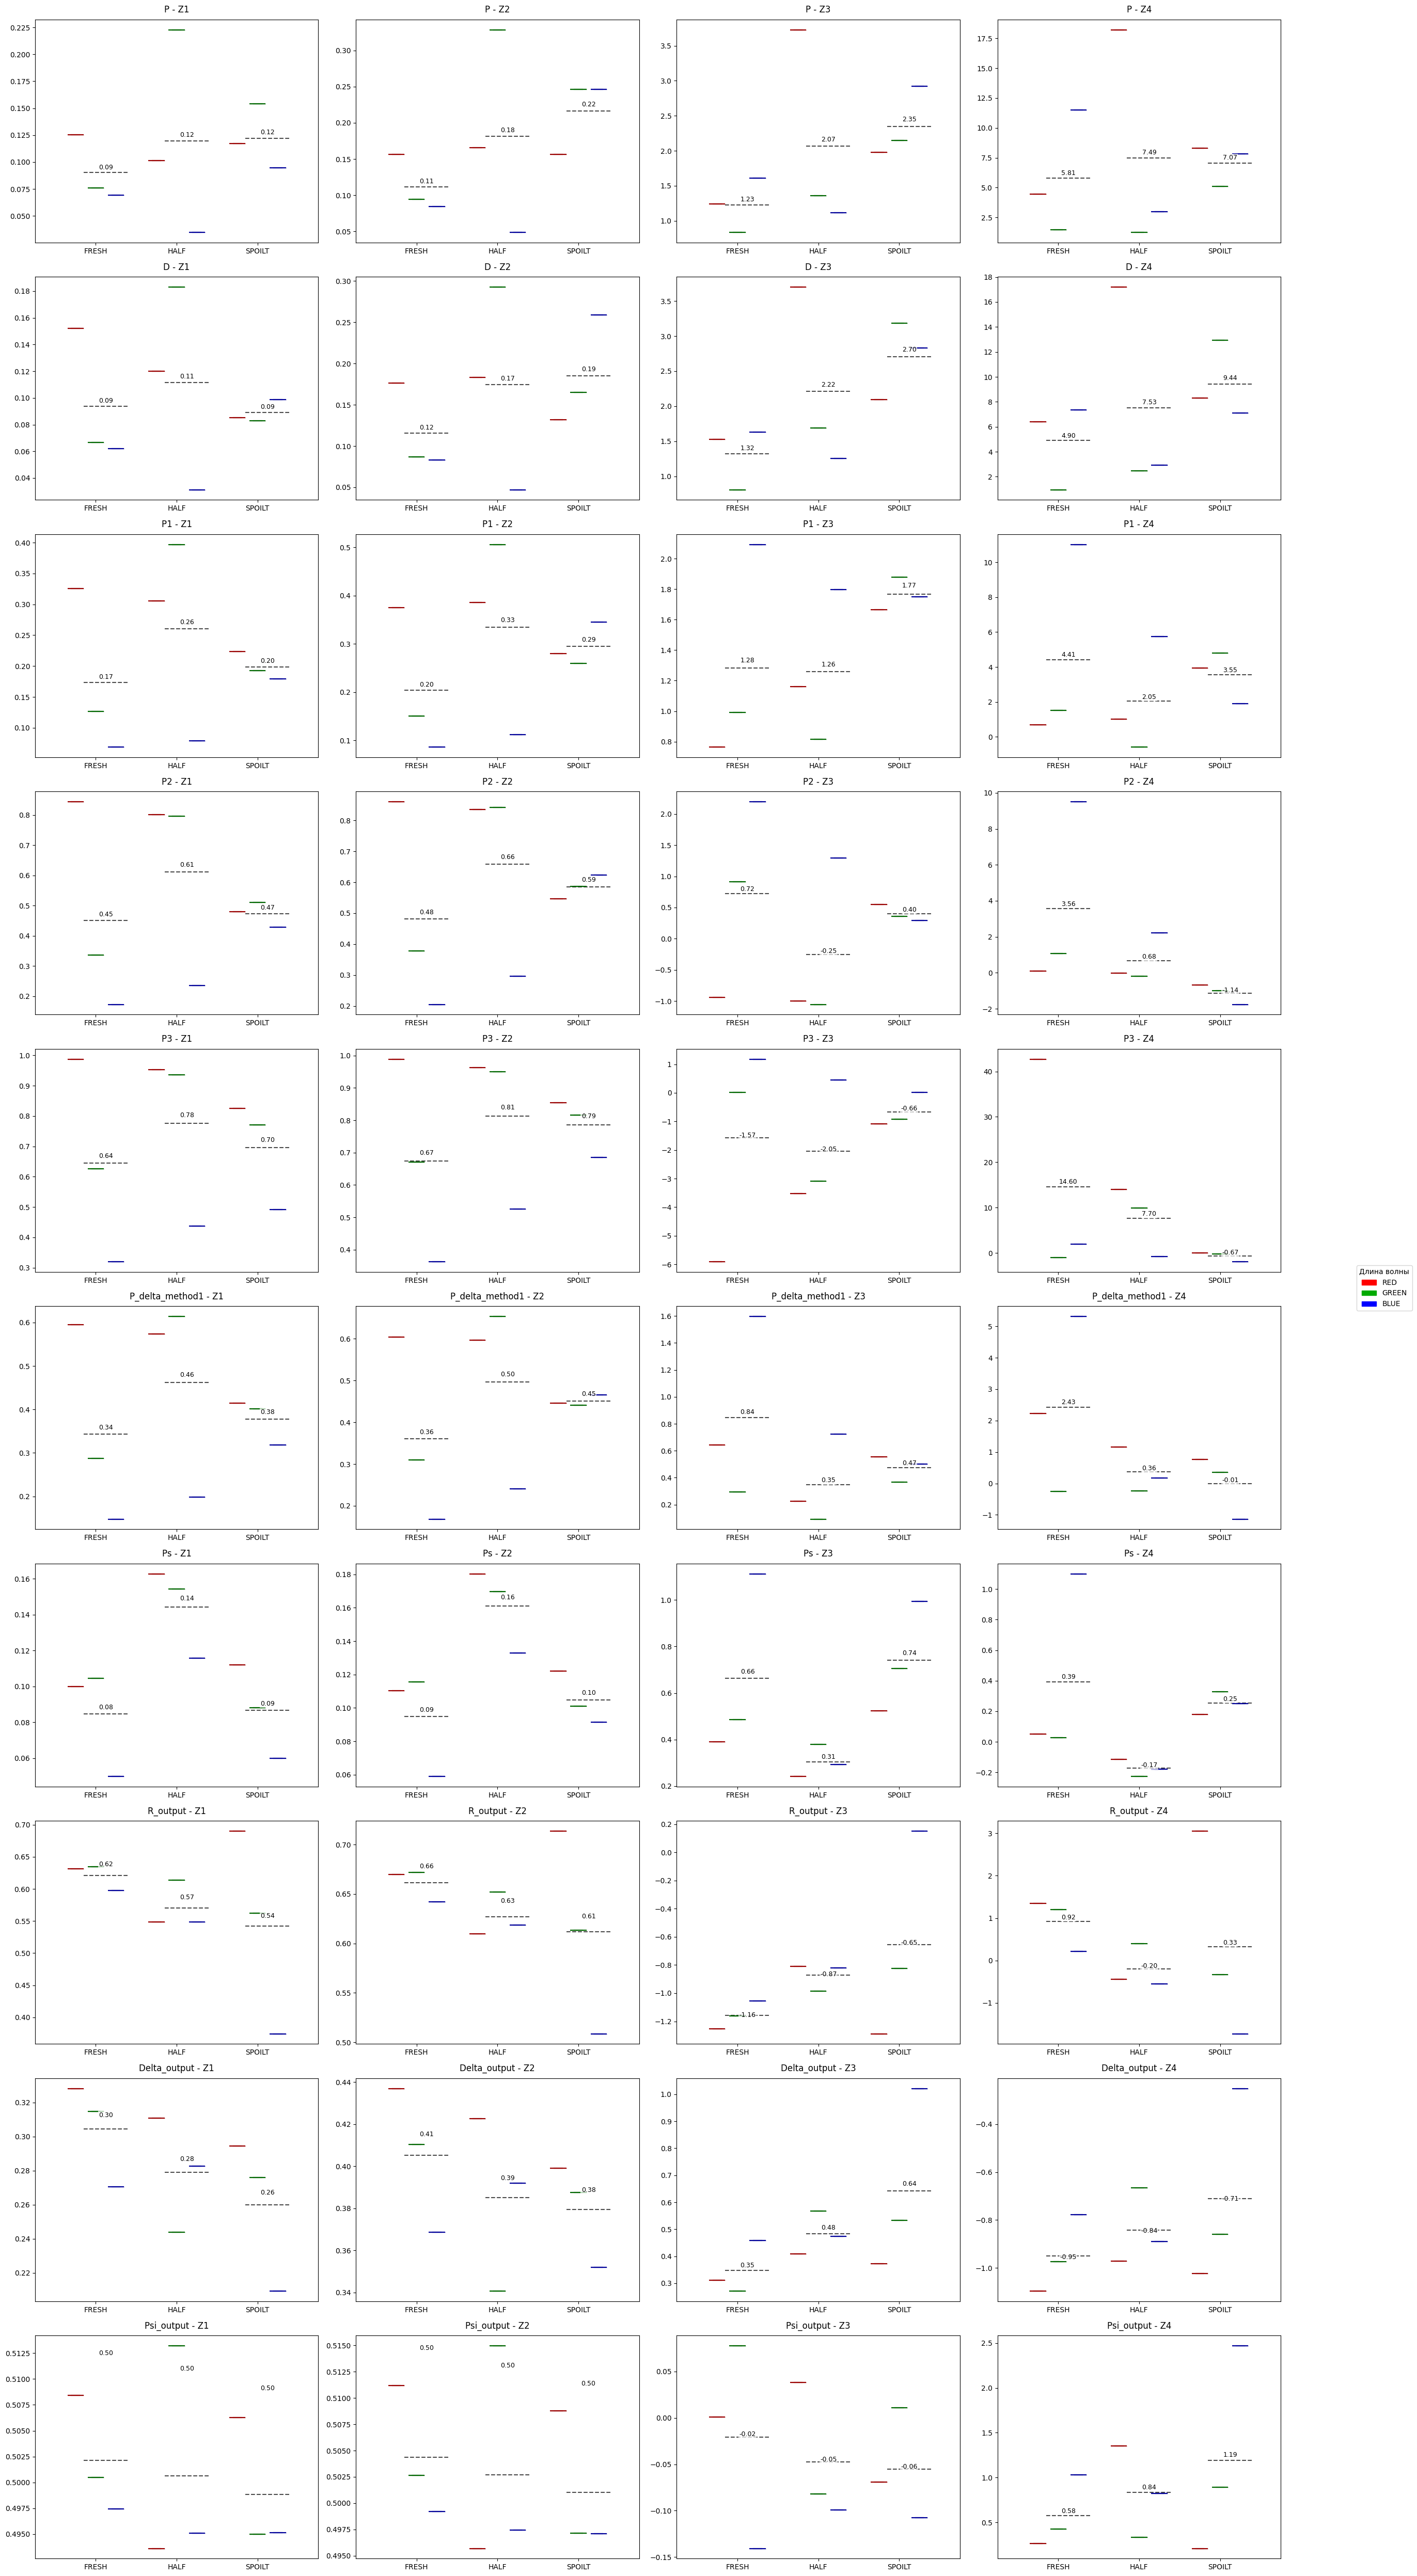


Результаты корреляции Спирмена:
              method  color moment  spearman_rho  p_value
0                  P    RED     Z1        0.5000   0.6667
1                  P  GREEN     Z1       -0.5000   0.6667
2                  P   BLUE     Z1       -0.5000   0.6667
3                  P    RED     Z2        0.5000   0.6667
4                  P  GREEN     Z2       -0.5000   0.6667
5                  P   BLUE     Z2       -0.5000   0.6667
6                  P    RED     Z3       -0.5000   0.6667
7                  P  GREEN     Z3       -1.0000   0.0000
8                  P   BLUE     Z3       -0.5000   0.6667
9                  P    RED     Z4       -0.5000   0.6667
10                 P  GREEN     Z4       -0.5000   0.6667
11                 P   BLUE     Z4        0.5000   0.6667
12                 D    RED     Z1        1.0000   0.0000
13                 D  GREEN     Z1       -0.5000   0.6667
14                 D   BLUE     Z1       -0.5000   0.6667
15                 D    RED     Z2     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
import numpy as np

# Загрузка данных
data = pd.read_csv("Книга1.csv", sep=';')
data[['freshness_color', 'method']] = data['path'].str.split('/', expand=True)
data[['freshness', 'color']] = data['freshness_color'].str.split('_', expand=True)

# Кодируем свежесть численно
data['freshness_encoded'] = data['freshness'].map({'FRESH': 2, 'HALF': 1, 'SPOILT': 0})

# Настройки цветов
palette = {'RED': '#FF0000', 'GREEN': '#00AA00', 'BLUE': '#0000FF'}  # Яркие насыщенные цвета
edge_colors = {'RED': '#990000', 'GREEN': '#006600', 'BLUE': '#000099'}  # Для контура boxplot'ов

# Создаем фигуру
methods = data['method'].unique()
moments = ['Z1', 'Z2', 'Z3', 'Z4']
fig, axes = plt.subplots(len(methods), len(moments), figsize=(25, 5*len(methods)))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Создаем список для хранения результатов корреляции
correlation_results = []

for i, method in enumerate(methods):
    method_data = data[data['method'] == method]

    for j, moment in enumerate(moments):
        ax = axes[i,j]

        # Ручное построение boxplot с контролем цветов
        for k, color_type in enumerate(['RED', 'GREEN', 'BLUE']):
            subset = method_data[method_data['color'] == color_type]
            if not subset.empty:
                # Основной boxplot
                box = ax.boxplot(
                    subset.groupby('freshness')[moment].apply(list),
                    positions=[x + k*0.25 for x in range(3)],
                    widths=0.2,
                    patch_artist=True,
                    showfliers=False
                )

                # Установка цветов
                for patch in box['boxes']:
                    patch.set_facecolor(palette[color_type])
                    patch.set_edgecolor(edge_colors[color_type])
                    patch.set_alpha(0.7)

                # Медиана и усы
                for element in ['medians', 'whiskers', 'caps']:
                    plt.setp(box[element], color=edge_colors[color_type], linewidth=1.5)

                # Вычисляем корреляцию Спирмена
                rho, pval = stats.spearmanr(subset['freshness_encoded'], subset[moment])

                # Добавляем результаты в список
                correlation_results.append({
                    'method': method,
                    'color': color_type,
                    'moment': moment,
                    'spearman_rho': rho,
                    'p_value': pval
                })

        # Добавляем средние значения между цветами для каждой свежести
        for fresh_idx, freshness in enumerate(['FRESH', 'HALF', 'SPOILT']):
            # Вычисляем среднее между всеми цветами для данной свежести
            mean_val = method_data[method_data['freshness'] == freshness][moment].mean()

            # Рисуем горизонтальную линию среднего
            ax.hlines(
                y=mean_val,
                xmin=fresh_idx + 0.1,  # Начало линии (немного правее левого края)
                xmax=fresh_idx + 0.65, # Конец линии (немного левее правого края)
                colors='black',
                linestyles='dashed',
                linewidth=1.5,
                alpha=0.7
            )

            # Подписываем значение среднего
            ax.text(
                x=fresh_idx + 0.375,  # Центр между цветами
                y=mean_val * 1.02,    # Немного выше линии
                s=f'{mean_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

        # Настройка осей (оставляем без изменений)
        ax.set_xticks([0.25, 1.25, 2.25])
        ax.set_xticklabels(['FRESH', 'HALF', 'SPOILT'])
        ax.set_title(f"{method} - {moment}", pad=10)

# Преобразуем список результатов в DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Создаем кастомную легенду (без изменений)
legend_patches = [
    mpatches.Patch(color=palette['RED'], label='RED'),
    mpatches.Patch(color=palette['GREEN'], label='GREEN'),
    mpatches.Patch(color=palette['BLUE'], label='BLUE')
]
fig.legend(handles=legend_patches, title='Длина волны',
           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

# Выводим результаты корреляции
print("\nРезультаты корреляции Спирмена:")
print(correlation_df)

# Сохраняем результаты в файл
correlation_df.to_csv('spearman_correlation_results.csv', index=False, sep=';')

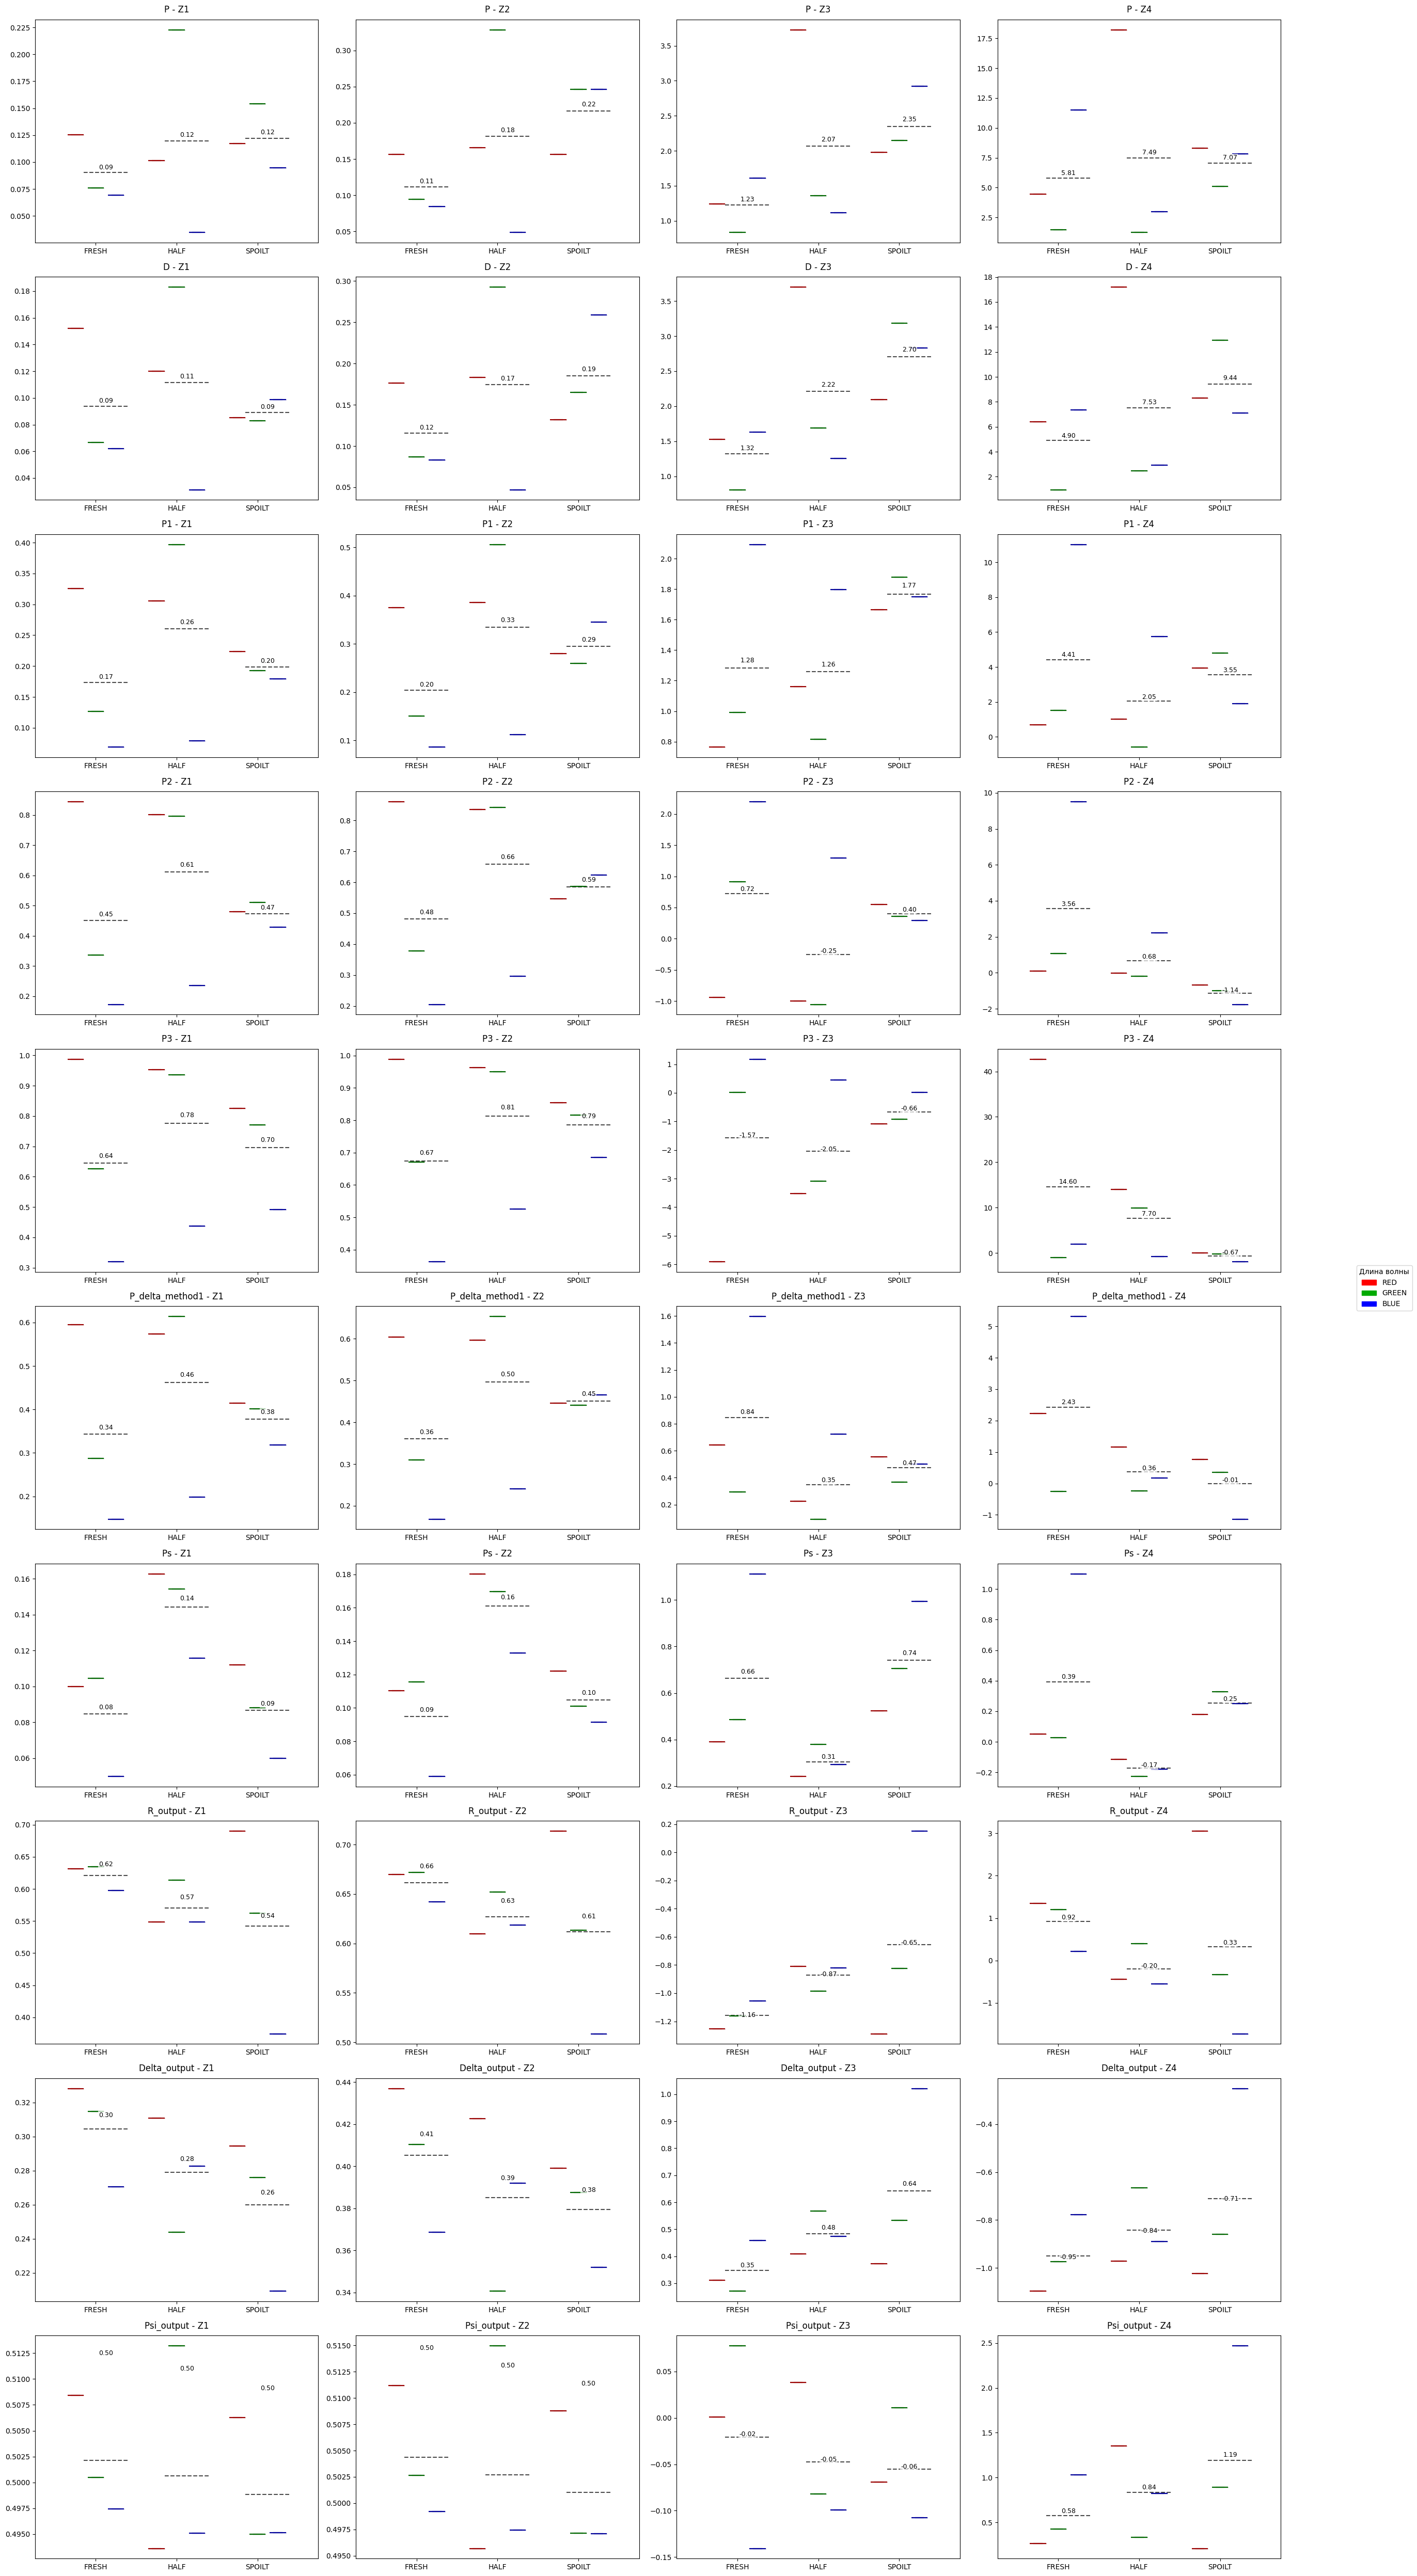

Средние значения сохранены в файл 'mean_z_values.csv'


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
import numpy as np

# Загрузка данных
data = pd.read_csv("Книга1.csv", sep=';')
data[['freshness_color', 'method']] = data['path'].str.split('/', expand=True)
data[['freshness', 'color']] = data['freshness_color'].str.split('_', expand=True)

# Кодируем свежесть численно
data['freshness_encoded'] = data['freshness'].map({'FRESH': 2, 'HALF': 1, 'SPOILT': 0})

# Настройки цветов
palette = {'RED': '#FF0000', 'GREEN': '#00AA00', 'BLUE': '#0000FF'}  # Яркие насыщенные цвета
edge_colors = {'RED': '#990000', 'GREEN': '#006600', 'BLUE': '#000099'}  # Для контура boxplot'ов

# Создаем фигуру
methods = data['method'].unique()
moments = ['Z1', 'Z2', 'Z3', 'Z4']
fig, axes = plt.subplots(len(methods), len(moments), figsize=(25, 5*len(methods)))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Создаем DataFrame для хранения средних значений
mean_values = pd.DataFrame(columns=['method', 'freshness', 'Z1', 'Z2', 'Z3', 'Z4'])

for i, method in enumerate(methods):
    method_data = data[data['method'] == method]

    for j, moment in enumerate(moments):
        ax = axes[i,j]

        # Ручное построение boxplot с контролем цветов
        for k, color_type in enumerate(['RED', 'GREEN', 'BLUE']):
            subset = method_data[method_data['color'] == color_type]
            if not subset.empty:
                # Основной boxplot
                box = ax.boxplot(
                    subset.groupby('freshness')[moment].apply(list),
                    positions=[x + k*0.25 for x in range(3)],
                    widths=0.2,
                    patch_artist=True,
                    showfliers=False
                )

                # Установка цветов
                for patch in box['boxes']:
                    patch.set_facecolor(palette[color_type])
                    patch.set_edgecolor(edge_colors[color_type])
                    patch.set_alpha(0.7)

                # Медиана и усы
                for element in ['medians', 'whiskers', 'caps']:
                    plt.setp(box[element], color=edge_colors[color_type], linewidth=1.5)

        # Добавляем средние значения между цветами для каждой свежести
        for fresh_idx, freshness in enumerate(['FRESH', 'HALF', 'SPOILT']):
            # Вычисляем среднее между всеми цветами для данной свежести
            mean_val = method_data[method_data['freshness'] == freshness][moment].mean()

            # Сохраняем среднее значение в DataFrame
            if moment == 'Z1':  # Создаем новую запись только для первого момента
                new_row = {
                    'method': method,
                    'freshness': freshness,
                    'Z1': np.nan,
                    'Z2': np.nan,
                    'Z3': np.nan,
                    'Z4': np.nan
                }
                mean_values = pd.concat([mean_values, pd.DataFrame([new_row])], ignore_index=True)

            # Обновляем значение для текущего момента
            idx = (mean_values['method'] == method) & (mean_values['freshness'] == freshness)
            mean_values.loc[idx, moment] = mean_val

            # Рисуем горизонтальную линию среднего
            ax.hlines(
                y=mean_val,
                xmin=fresh_idx + 0.1,
                xmax=fresh_idx + 0.65,
                colors='black',
                linestyles='dashed',
                linewidth=1.5,
                alpha=0.7
            )

            # Подписываем значение среднего
            ax.text(
                x=fresh_idx + 0.375,
                y=mean_val * 1.02,
                s=f'{mean_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

        # Настройка осей
        ax.set_xticks([0.25, 1.25, 2.25])
        ax.set_xticklabels(['FRESH', 'HALF', 'SPOILT'])
        ax.set_title(f"{method} - {moment}", pad=10)

# Создаем кастомную легенду
legend_patches = [
    mpatches.Patch(color=palette['RED'], label='RED'),
    mpatches.Patch(color=palette['GREEN'], label='GREEN'),
    mpatches.Patch(color=palette['BLUE'], label='BLUE')
]
fig.legend(handles=legend_patches, title='Длина волны',
           bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

# Сохраняем средние значения в файл
mean_values.to_csv('mean_z_values.csv', index=False, sep=';')
print("Средние значения сохранены в файл 'mean_z_values.csv'")

<ipython-input-46-53afcf7abe56>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap = sns.heatmap(pivot.replace({"↑ Рост": 1, "↓ Спад": -1, "Нет тренда": 0}),


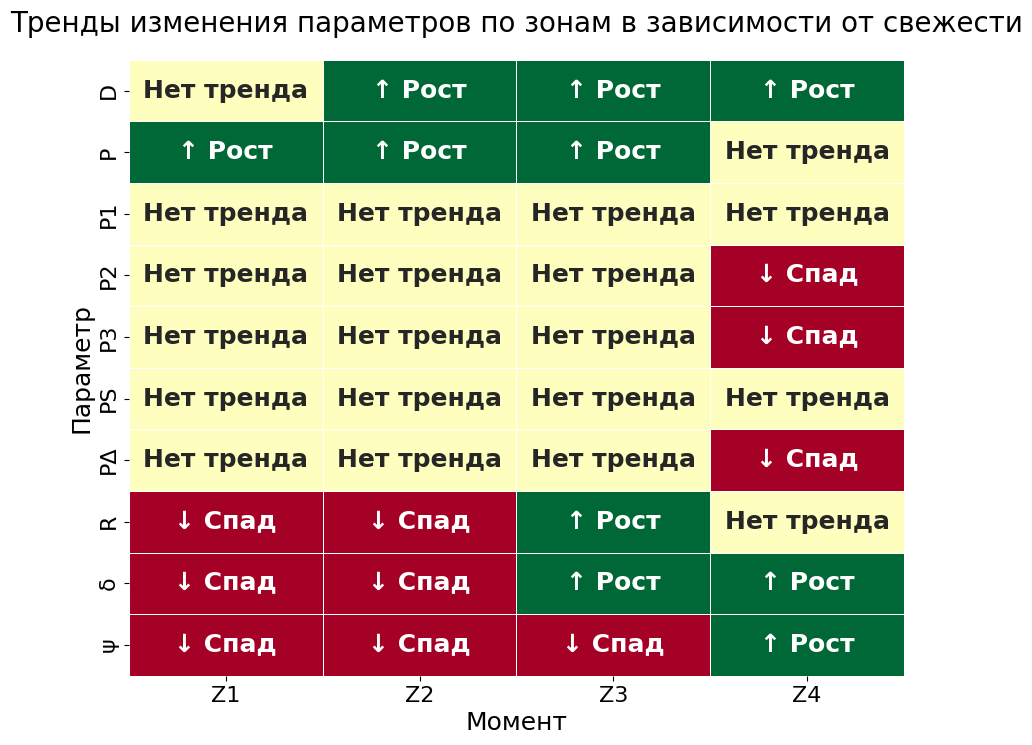

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных (пример для P, D, P1)
data = {
    "Параметр": ["P"]*3 + ["D"]*3 + ["P1"]*3 + ["P2"]*3 + ["P3"]*3 + ["PΔ"]*3 + ["PS"]*3 + ["R"]*3 + ["δ"]*3 + ["ψ"]*3,
    "Свежесть": ["FRESH", "HALF", "SPOILT"] * 10,
    "Z1": [0.090, 0.120, 0.122, 0.094, 0.111, 0.089, 0.174, 0.261, 0.199, 0.451, 0.611, 0.473, 0.644, 0.776, 0.696, 0.344, 0.462, 0.378, 0.085, 0.144, 0.087, 0.621, 0.570, 0.542, 0.305, 0.279, 0.260, 0.502, 0.501, 0.499],
    "Z2": [0.112, 0.181, 0.216, 0.116, 0.174, 0.185, 0.204, 0.335, 0.295, 0.481, 0.658, 0.586, 0.674, 0.813, 0.786, 0.361, 0.497, 0.451, 0.095, 0.161, 0.105, 0.661, 0.627, 0.612, 0.405, 0.385, 0.380, 0.504, 0.503, 0.501],
    "Z3": [1.230, 2.069, 2.350, 1.321, 2.215, 2.704, 1.284, 1.259, 1.766, 0.725, -0.252, 0.402, -1.572, -2.048, -0.663, 0.845, 0.348, 0.474, 0.663, 0.305, 0.741, -1.157, -0.871, -0.654, 0.347, 0.483, 0.642, -0.021, -0.048, -0.055],
    "Z4": [5.806, 7.491, 7.065, 4.897, 7.531, 9.439, 4.414, 2.051, 3.551, 3.559, 0.675, -1.139, 14.597, 7.697, -0.671, 2.431, 0.364, -0.008, 0.394, -0.173, 0.253, 0.921, -0.200, 0.331, -0.950, -0.842, -0.712, 0.576, 0.837, 1.191]
}
df = pd.DataFrame(data)

# Функция для определения типа тенденции
def get_trend(z_values):
    fresh, half, spoilt = z_values
    if fresh < half < spoilt:
        return "↑ Рост"
    elif fresh > half > spoilt:
        return "↓ Спад"
    else:
        return "Нет тренда"

# Создаем сводную таблицу с тенденциями
trends = []
for param in df["Параметр"].unique():
    for zone in ["Z1", "Z2", "Z3", "Z4"]:
        z_values = df[df["Параметр"] == param][zone].values
        trend = get_trend(z_values)
        trends.append({"Параметр": param, "Момент": zone, "Тренд": trend})
trend_df = pd.DataFrame(trends)

# Исправленный вызов pivot
pivot = trend_df.pivot(index="Параметр", columns="Момент", values="Тренд")

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot.replace({"↑ Рост": 1, "↓ Спад": -1, "Нет тренда": 0}),
            cmap="RdYlGn",
            annot=pivot.values,
            fmt="",
            cbar=False,
            linewidths=0.5,
            annot_kws={"size": 18, "weight": "bold"})  # Увеличение размера шрифта аннотаций

# Увеличение шрифта подписей осей и заголовка
heatmap.set_xlabel("Момент", fontsize=18)
heatmap.set_ylabel("Параметр", fontsize=18)
heatmap.set_title("Тренды изменения параметров по зонам в зависимости от свежести",
                 pad=20, fontsize=20)
# Увеличение шрифта меток на осях
heatmap.tick_params(axis='both', which='major', labelsize=16)